<a href="https://colab.research.google.com/github/j5220109/Study/blob/main/77C2_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import platform, matplotlib
from matplotlib import rc

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
!apt -qq -y install fonts-nanum
fm._rebuild() 
plt.rc('font', family='NanumBarunGothic') 

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import joblib

# 맥에서 레티나 디스플레이 사용 설정
%config InlineBackend.figure_format = 'retina'

# 그림 크기와 폰트 설정
matplotlib.rcParams['figure.figsize'] = (6,4)
plt.rc('font', size=13)





In [3]:
data1 = pd.read_csv('https://raw.githubusercontent.com/j5220109/Study/main/20221001-07.csv', encoding='EUC-KR', header=1)
print(data1.shape)
data1.head()

(4100, 350)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (112,212,274,334,339) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,...,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3,Unnamed: 349
0,1,2022-10-01,2,2022-10-01 15:17:37,35,ACQ30460604,"77A2"" GI 다크 아이언 실버",SACQ30460604KTS2O11002,테이프제거,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN
1,1,2022-10-01,3,2022-10-01 15:18:06,35,ACQ30460604,"77A2"" GI 다크 아이언 실버",SACQ30460604KTS2O11003,테이프제거,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN
2,1,2022-10-01,4,2022-10-01 15:55:50,35,ACQ30460604,"77A2"" GI 다크 아이언 실버",SACQ30460604KTS2O11004,테이프제거,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN
3,1,2022-10-01,5,2022-10-01 16:31:12,35,ACQ30460604,"77A2"" GI 다크 아이언 실버",SACQ30460604KTS2O11005,테이프제거,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN
4,1,2022-10-01,6,2022-10-01 16:31:49,35,ACQ30460604,"77A2"" GI 다크 아이언 실버",SACQ30460604KTS2O11006,테이프제거,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN


In [4]:
data2 = pd.read_csv('https://raw.githubusercontent.com/j5220109/Study/main/20221008-14.csv', encoding='EUC-KR', header=1)
print(data2.shape)
data2.head()

(4766, 350)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (112,212,274,334) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,...,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3,Unnamed: 349
0,1,2022-10-08,1,2022-10-08 09:40:13,33,ACQ30460602,"77A2"" 다크 아이언 실버",SACQ30460602KTS2O81001,테이프제거,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN
1,1,2022-10-08,2,2022-10-08 09:40:58,33,ACQ30460602,"77A2"" 다크 아이언 실버",SACQ30460602KTS2O81002,테이프제거,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN
2,1,2022-10-08,3,2022-10-08 10:16:46,33,ACQ30460602,"77A2"" 다크 아이언 실버",SACQ30460602KTS2O81003,휨검사,NaN,...,合,-1.9,合,-0.9,合,-1.0,合,-1.2,合,NaN
3,1,2022-10-08,4,2022-10-08 11:03:36,33,ACQ30460602,"77A2"" 다크 아이언 실버",SACQ30460602KTS2O81004,휨검사,NaN,...,合,-3.4,合,-2.6,合,-1.4,合,-1.7,合,NaN
4,1,2022-10-08,5,2022-10-08 11:39:20,33,ACQ30460602,"77A2"" 다크 아이언 실버",SACQ30460602KTS2O81005,휨검사,NaN,...,合,-3.8,合,-3.2,合,-1.4,合,-1.6,合,NaN


In [5]:
data3 = pd.read_csv('https://raw.githubusercontent.com/j5220109/Study/main/20221014-21.csv', encoding='EUC-KR', header=1)
print(data3.shape)
data3.head()

(5450, 350)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (112,212,274,334) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,...,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3,Unnamed: 349
0,1,2022-10-15,1,2022-10-15 08:35:54,22,ACQ30461104,"77C2"" 카밍/베이지",SACQ30461104KTS2OF1001,전면검사,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN
1,1,2022-10-15,2,2022-10-15 08:39:46,22,ACQ30461104,"77C2"" 카밍/베이지",SACQ30461104KTS2OF1002,테이프제거,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN
2,1,2022-10-15,3,2022-10-15 09:11:43,22,ACQ30461104,"77C2"" 카밍/베이지",SACQ30461104KTS2OF1003,휨검사,NaN,...,合,-1.2,合,-1.8,合,-1.4,合,-1.5,合,NaN
3,1,2022-10-15,4,2022-10-15 09:20:47,22,ACQ30461104,"77C2"" 카밍/베이지",SACQ30461104KTS2OF1004,테이프제거,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN
4,1,2022-10-15,5,2022-10-15 09:52:12,22,ACQ30461104,"77C2"" 카밍/베이지",SACQ30461104KTS2OF1005,휨검사,NaN,...,合,-2.1,合,-2.1,合,-1.3,合,-1.7,合,NaN


In [6]:
data4 = pd.read_csv('https://raw.githubusercontent.com/j5220109/Study/main/20221022-28.csv', encoding='EUC-KR', header=1)
print(data4.shape)
data4.head()

(3677, 350)


,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,...,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3,Unnamed: 349
0,1,2022-10-22,10,2022-10-22 16:08:35,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2ON100A,테이프제거,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN
1,1,2022-10-22,11,2022-10-22 16:08:55,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2ON100B,테이프제거,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN
2,1,2022-10-22,12,2022-10-22 16:15:43,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2ON100C,테이프제거,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN
3,1,2022-10-22,13,2022-10-22 16:35:39,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2ON100D,테이프제거,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN
4,1,2022-10-22,14,2022-10-22 16:48:33,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2ON100E,테이프제거,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN


In [7]:
data5 = pd.read_csv('https://raw.githubusercontent.com/j5220109/Study/main/20221029-1101.csv', encoding='EUC-KR', header=1)
print(data5.shape)
data5.head()

(1718, 350)


,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,...,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3,Unnamed: 349
0,1,2022-10-30,1,2022-10-31 07:57:52,22,ACQ30461104,"77C2"" 카밍/베이지",SACQ30461104KTS2OW1001,단변,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN
1,1,2022-10-30,2,2022-10-31 07:58:26,22,ACQ30461104,"77C2"" 카밍/베이지",SACQ30461104KTS2OW1002,휨검사,NaN,...,合,-2.4,合,-3.1,合,-1.5,合,-2.0,合,NaN
2,1,2022-10-31,2,2022-10-31 08:10:13,22,ACQ30461104,"77C2"" 카밍/베이지",SACQ30461104KTS2OX1002,전면검사,NaN,...,-,0.0,-,0.0,-,0.0,-,0.0,-,NaN
3,1,2022-10-31,3,2022-10-31 08:10:23,22,ACQ30461104,"77C2"" 카밍/베이지",SACQ30461104KTS2OX1003,휨검사,NaN,...,合,-3.5,合,-1.8,合,-1.1,合,-0.5,合,NaN
4,1,2022-10-31,4,2022-10-31 08:19:09,22,ACQ30461104,"77C2"" 카밍/베이지",SACQ30461104KTS2OX1004,휨검사,NaN,...,合,-3.9,合,-4.0,合,-2.6,合,-2.9,合,NaN


In [8]:
data = pd.concat([data1, data2], ignore_index=True)
print(data.shape)

(8866, 350)


In [9]:
data = pd.concat([data, data3], ignore_index=True)
print(data.shape)

(14316, 350)


In [10]:
data = pd.concat([data, data4], ignore_index=True)
print(data.shape)

(17993, 350)


In [11]:
data = pd.concat([data, data5], ignore_index=True)
print(data.shape)

(19711, 350)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19711 entries, 0 to 19710
Columns: 350 entries, 라인 to Unnamed: 349
dtypes: float64(136), int64(134), object(80)
memory usage: 52.6+ MB


In [13]:
data.isnull().sum()

라인                  0
작업일자                0
순번                  0
생성일시                0
모델번호                0
                ...  
좌측                  0
판정.2                0
우측                  0
판정.3                0
Unnamed: 349    19711
Length: 350, dtype: int64

In [14]:
data = data.drop(['Unnamed: 349'], axis=1)

In [15]:
data

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,...,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
0,1,2022-10-01,2,2022-10-01 15:17:37,35,ACQ30460604,"77A2"" GI 다크 아이언 실버",SACQ30460604KTS2O11002,테이프제거,NaN,...,NaN,-,0.0,-,0.0,-,0.0,-,0.0,-
1,1,2022-10-01,3,2022-10-01 15:18:06,35,ACQ30460604,"77A2"" GI 다크 아이언 실버",SACQ30460604KTS2O11003,테이프제거,NaN,...,NaN,-,0.0,-,0.0,-,0.0,-,0.0,-
2,1,2022-10-01,4,2022-10-01 15:55:50,35,ACQ30460604,"77A2"" GI 다크 아이언 실버",SACQ30460604KTS2O11004,테이프제거,NaN,...,NaN,-,0.0,-,0.0,-,0.0,-,0.0,-
3,1,2022-10-01,5,2022-10-01 16:31:12,35,ACQ30460604,"77A2"" GI 다크 아이언 실버",SACQ30460604KTS2O11005,테이프제거,NaN,...,NaN,-,0.0,-,0.0,-,0.0,-,0.0,-
4,1,2022-10-01,6,2022-10-01 16:31:49,35,ACQ30460604,"77A2"" GI 다크 아이언 실버",SACQ30460604KTS2O11006,테이프제거,NaN,...,NaN,-,0.0,-,0.0,-,0.0,-,0.0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19706,1,2022-11-01,973,2022-11-01 17:19:51,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2N110UM,휨검사,NaN,...,2022-11-01 17:27:07,合,-1.5,合,-1.8,合,-1.6,合,-1.7,合
19707,1,2022-11-01,974,2022-11-01 17:20:19,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2N110UN,휨검사,NaN,...,2022-11-01 17:56:55,合,-2.3,合,-2.0,合,-1.6,合,-1.6,合
19708,1,2022-11-01,976,2022-11-01 20:20:26,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2N110UQ,휨검사,NaN,...,2022-11-01 20:38:22,合,-1.8,合,-1.5,合,-1.6,合,-1.4,合
19709,1,2022-11-01,977,2022-11-01 20:20:48,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2N110UR,휨검사,NaN,...,2022-11-02 08:03:05,合,-1.8,合,-1.3,合,-1.6,合,-1.6,合


In [16]:
data['모델코드'] == 'ACQ30461107'

0        False
1        False
2        False
3        False
4        False
         ...  
19706     True
19707     True
19708     True
19709     True
19710     True
Name: 모델코드, Length: 19711, dtype: bool

In [17]:
c2_data = data[data['모델코드'] == 'ACQ30461107']

In [18]:
c2_data

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,...,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,...,2022-10-04 10:58:53,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,7,2022-10-04 08:21:57,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41007,휨검사,NaN,...,2022-10-04 14:17:25,合,-2.3,合,-2.7,合,-0.9,合,-1.4,合
9,1,2022-10-04,8,2022-10-04 08:22:37,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41008,휨검사,NaN,...,2022-10-04 14:18:13,合,-2.2,合,-2.6,合,-1.1,合,-1.5,合
10,1,2022-10-04,10,2022-10-04 08:24:27,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O4100A,휨검사,NaN,...,2022-10-04 14:18:31,合,-2.4,合,-2.5,合,-1.1,合,-1.4,合
11,1,2022-10-04,12,2022-10-04 14:05:07,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O4100C,휨검사,NaN,...,2022-10-04 14:19:37,合,-1.9,合,-2.3,合,-0.8,合,-1.1,合
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19706,1,2022-11-01,973,2022-11-01 17:19:51,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2N110UM,휨검사,NaN,...,2022-11-01 17:27:07,合,-1.5,合,-1.8,合,-1.6,合,-1.7,合
19707,1,2022-11-01,974,2022-11-01 17:20:19,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2N110UN,휨검사,NaN,...,2022-11-01 17:56:55,合,-2.3,合,-2.0,合,-1.6,合,-1.6,合
19708,1,2022-11-01,976,2022-11-01 20:20:26,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2N110UQ,휨검사,NaN,...,2022-11-01 20:38:22,合,-1.8,合,-1.5,合,-1.6,合,-1.4,合
19709,1,2022-11-01,977,2022-11-01 20:20:48,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2N110UR,휨검사,NaN,...,2022-11-02 08:03:05,合,-1.8,合,-1.3,合,-1.6,合,-1.6,合


In [19]:
print(c2_data.columns)

Index(['라인', '작업일자', '순번', '생성일시', '모델번호', '모델코드', '모델이름', '바코드', '최종공정', '선택',
       ...
       '작업일시.4', '종합판정', '상측', '판정', '하측', '판정.1', '좌측', '판정.2', '우측', '판정.3'],
      dtype='object', length=349)


In [20]:
c2_data.head()

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,...,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,...,2022-10-04 10:58:53,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,7,2022-10-04 08:21:57,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41007,휨검사,NaN,...,2022-10-04 14:17:25,合,-2.3,合,-2.7,合,-0.9,合,-1.4,合
9,1,2022-10-04,8,2022-10-04 08:22:37,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41008,휨검사,NaN,...,2022-10-04 14:18:13,合,-2.2,合,-2.6,合,-1.1,合,-1.5,合
10,1,2022-10-04,10,2022-10-04 08:24:27,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O4100A,휨검사,NaN,...,2022-10-04 14:18:31,合,-2.4,合,-2.5,合,-1.1,合,-1.4,合
11,1,2022-10-04,12,2022-10-04 14:05:07,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O4100C,휨검사,NaN,...,2022-10-04 14:19:37,合,-1.9,合,-2.3,合,-0.8,合,-1.1,合


In [21]:
pd.set_option('display.max_columns', None)

In [22]:
c2_data.head()

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,탱크온도,호스온도,노즐온도,작업일시.1,작업일시.2,작업횟수,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:사용여부,1:평균출력 관리범위,1:평균출력1,1:평균출력2,1:평균출력3,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:사용여부,2:평균출력 관리범위,2:평균출력1,2:평균출력2,2:평균출력3,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:사용여부,3:평균출력 관리범위,3:평균출력1,3:평균출력2,3:평균출력3,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:사용여부,4:평균출력 관리범위,4:평균출력1,4:평균출력2,4:평균출력3,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:사용여부,5:평균출력 관리범위,5:평균출력1,5:평균출력2,5:평균출력3,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:사용여부,6:평균출력 관리범위,6:평균출력1,6:평균출력2,6:평균출력3,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:사용여부,7:평균출력 관리범위,7:평균출력1,7:평균출력2,7:평균출력3,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:사용여부,8:평균출력 관리범위,8:평균출력1,8:평균출력2,8:평균출력3,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:사용여부,9:평균출력 관리범위,9:평균출력1,9:평균출력2,9:평균출력3,10:시간,10:진폭,10:주파수,10:에너지,10:최대출력,10:사용여부,10:평균출력 관리범위,10:평균출력1,10:평균출력2,10:평균출력3,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:사용여부,11:평균출력 관리범위,11:평균출력1,11:평균출력2,11:평균출력3,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:사용여부,12:평균출력 관리범위,12:평균출력1,12:평균출력2,12:평균출력3,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:사용여부,13:평균출력 관리범위,13:평균출력1,13:평균출력2,13:평균출력3,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:사용여부,14:평균출력 관리범위,14:평균출력1,14:평균출력2,14:평균출력3,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:사용여부,15:평균출력 관리범위,15:평균출력1,15:평균출력2,15:평균출력3,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:사용여부,16:평균출력 관리범위,16:평균출력1,16:평균출력2,16:평균출력3,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:사용여부,17:평균출력 관리범위,17:평균출력1,17:평균출력2,17:평균출력3,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:사용여부,18:평균출력 관리범위,18:평균출력1,18:평균출력2,18:평균출력3,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:사용여부,19:평균출력 관리범위,19:평균출력1,19:평균출력2,19:평균출력3,20:시간,20:진폭,20:주파수,20:에너지,20:최대출력,20:사용여부,20:평균출력 관리범위,20:평균출력1,20:평균출력2,20:평균출력3,작업일시.3,작업횟수.1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:사용여부.1,1:평균출력 관리범위.1,1:평균출력1.1,1:평균출력2.1,1:평균출력3.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:사용여부.1,2:평균출력 관리범위.1,2:평균출력1.1,2:평균출력2.1,2:평균출력3.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:사용여부.1,3:평균출력 관리범위.1,3:평균출력1.1,3:평균출력2.1,3:평균출력3.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:사용여부.1,4:평균출력 관리범위.1,4:평균출력1.1,4:평균출력2.1,4:평균출력3.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:사용여부.1,5:평균출력 관리범위.1,5:평균출력1.1,5:평균출력2.1,5:평균출력3.1,6:시간.1,6:진폭.1,6:주파수.1,6:에너지.1,6:최대출력.1,6:사용여부.1,6:평균출력 관리범위.1,6:평균출력1.1,6:평균출력2.1,6:평균출력3.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:사용여부.1,7:평균출력 관리범위.1,7:평균출력1.1,7:평균출력2.1,7:평균출력3.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:사용여부.1,8:평균출력 관리범위.1,8:평균출력1.1,8:평균출력2.1,8:평균출력3.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:사용여부.1,9:평균출력 관리범위.1,9:평균출력1.1,9:평균출력2.1,9:평균출력3.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:사용여부.1,10:평균출력 관리범위.1,10:평균출력1.1,10:평균출력2.1,10:평균출력3.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:사용여부.1,11:평균출력 관리범위.1,11:평균출력1.1,11:평균출력2.1,11:평균출력3.1,12:시간.1,12:진폭.1,12:주파수.1,12:에너지.1,12:최대출력.1,12:사용여부.1,12:평균출력 관리범위.1,12:평균출력1.1,12:평균출력2.1,12:평균출력3.1,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,2022-10-04 08:20:59,0,0,0,2022-10-04 08:22:09,2022-10-04 08:23:53,1.0,2.1,78,15.06,3938,2167,▣,1200 ~ 3100,2003,NaN,NaN,2.0,75,15.06,2983,1702,▣,1200 ~ 3100,1590,NaN,NaN,2.0,74,15.11,3208,1788,▣,1200 ~ 3100,1728,NaN,NaN,2.0,72,15.08,2928,1856,▣,1200 ~ 3100,1633,NaN,NaN,2.0,68,15.07,2925,1865,▣,1200 ~ 3100,1637,NaN,NaN,2.0,68,15.08,3396,2023,▣,1200 ~ 3100,1850,NaN,NaN,2.0,66,15.09,2555,1656,▣,1200 ~ 3100,1411,NaN,NaN,2.0,76,15.01,2798,1655,▣,1200 ~ 3100,1454,NaN,NaN,2.0,66,15.00,3427,2229,▣,1200 ~ 3100,1805,NaN,NaN,2.0,20,15.02,0,0,NaN,40 ~ 250,0,NaN,NaN,2.0,77,15.05,4516,2542,▣,1800 ~ 3100,2382,NaN,NaN,2.0,78,14.99,5600,2999,▣,1800 ~ 3100,2999,NaN,NaN,2.0,83,15.13,4998,2842,▣,1800 ~ 3100,2653,NaN,NaN,2.0,82,14.97,5044,2875,▣,1800 ~ 3100,2746,NaN,NaN,2.0,76,14.97,5334,2999,▣,1800 ~ 3100,2888,NaN,NaN,2.0,80,15.01,5049,2935,▣,1800 ~ 3100,2729,NaN,NaN,2.0,73,14.99,5111,2870,▣,1800 ~ 3100,2701,NaN,NaN,1.8,71,14.98,4130,2504,▣,1400 ~ 3100,2459,NaN,NaN,2.0,80,15.02,3644,2047,▣,1400 ~ 3100,1970,NaN,NaN,2.0,20,14.94,0,0,NaN,40 ~ 250,0,NaN,NaN,2022-10-04 08:

In [23]:
c2_data = c2_data.drop(['탱크온도', '호스온도', '노즐온도'], axis=1)

In [24]:
c2_data.head()

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,작업일시.1,작업일시.2,작업횟수,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:사용여부,1:평균출력 관리범위,1:평균출력1,1:평균출력2,1:평균출력3,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:사용여부,2:평균출력 관리범위,2:평균출력1,2:평균출력2,2:평균출력3,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:사용여부,3:평균출력 관리범위,3:평균출력1,3:평균출력2,3:평균출력3,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:사용여부,4:평균출력 관리범위,4:평균출력1,4:평균출력2,4:평균출력3,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:사용여부,5:평균출력 관리범위,5:평균출력1,5:평균출력2,5:평균출력3,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:사용여부,6:평균출력 관리범위,6:평균출력1,6:평균출력2,6:평균출력3,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:사용여부,7:평균출력 관리범위,7:평균출력1,7:평균출력2,7:평균출력3,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:사용여부,8:평균출력 관리범위,8:평균출력1,8:평균출력2,8:평균출력3,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:사용여부,9:평균출력 관리범위,9:평균출력1,9:평균출력2,9:평균출력3,10:시간,10:진폭,10:주파수,10:에너지,10:최대출력,10:사용여부,10:평균출력 관리범위,10:평균출력1,10:평균출력2,10:평균출력3,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:사용여부,11:평균출력 관리범위,11:평균출력1,11:평균출력2,11:평균출력3,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:사용여부,12:평균출력 관리범위,12:평균출력1,12:평균출력2,12:평균출력3,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:사용여부,13:평균출력 관리범위,13:평균출력1,13:평균출력2,13:평균출력3,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:사용여부,14:평균출력 관리범위,14:평균출력1,14:평균출력2,14:평균출력3,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:사용여부,15:평균출력 관리범위,15:평균출력1,15:평균출력2,15:평균출력3,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:사용여부,16:평균출력 관리범위,16:평균출력1,16:평균출력2,16:평균출력3,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:사용여부,17:평균출력 관리범위,17:평균출력1,17:평균출력2,17:평균출력3,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:사용여부,18:평균출력 관리범위,18:평균출력1,18:평균출력2,18:평균출력3,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:사용여부,19:평균출력 관리범위,19:평균출력1,19:평균출력2,19:평균출력3,20:시간,20:진폭,20:주파수,20:에너지,20:최대출력,20:사용여부,20:평균출력 관리범위,20:평균출력1,20:평균출력2,20:평균출력3,작업일시.3,작업횟수.1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:사용여부.1,1:평균출력 관리범위.1,1:평균출력1.1,1:평균출력2.1,1:평균출력3.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:사용여부.1,2:평균출력 관리범위.1,2:평균출력1.1,2:평균출력2.1,2:평균출력3.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:사용여부.1,3:평균출력 관리범위.1,3:평균출력1.1,3:평균출력2.1,3:평균출력3.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:사용여부.1,4:평균출력 관리범위.1,4:평균출력1.1,4:평균출력2.1,4:평균출력3.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:사용여부.1,5:평균출력 관리범위.1,5:평균출력1.1,5:평균출력2.1,5:평균출력3.1,6:시간.1,6:진폭.1,6:주파수.1,6:에너지.1,6:최대출력.1,6:사용여부.1,6:평균출력 관리범위.1,6:평균출력1.1,6:평균출력2.1,6:평균출력3.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:사용여부.1,7:평균출력 관리범위.1,7:평균출력1.1,7:평균출력2.1,7:평균출력3.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:사용여부.1,8:평균출력 관리범위.1,8:평균출력1.1,8:평균출력2.1,8:평균출력3.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:사용여부.1,9:평균출력 관리범위.1,9:평균출력1.1,9:평균출력2.1,9:평균출력3.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:사용여부.1,10:평균출력 관리범위.1,10:평균출력1.1,10:평균출력2.1,10:평균출력3.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:사용여부.1,11:평균출력 관리범위.1,11:평균출력1.1,11:평균출력2.1,11:평균출력3.1,12:시간.1,12:진폭.1,12:주파수.1,12:에너지.1,12:최대출력.1,12:사용여부.1,12:평균출력 관리범위.1,12:평균출력1.1,12:평균출력2.1,12:평균출력3.1,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,2022-10-04 08:20:59,2022-10-04 08:22:09,2022-10-04 08:23:53,1.0,2.1,78,15.06,3938,2167,▣,1200 ~ 3100,2003,NaN,NaN,2.0,75,15.06,2983,1702,▣,1200 ~ 3100,1590,NaN,NaN,2.0,74,15.11,3208,1788,▣,1200 ~ 3100,1728,NaN,NaN,2.0,72,15.08,2928,1856,▣,1200 ~ 3100,1633,NaN,NaN,2.0,68,15.07,2925,1865,▣,1200 ~ 3100,1637,NaN,NaN,2.0,68,15.08,3396,2023,▣,1200 ~ 3100,1850,NaN,NaN,2.0,66,15.09,2555,1656,▣,1200 ~ 3100,1411,NaN,NaN,2.0,76,15.01,2798,1655,▣,1200 ~ 3100,1454,NaN,NaN,2.0,66,15.00,3427,2229,▣,1200 ~ 3100,1805,NaN,NaN,2.0,20,15.02,0,0,NaN,40 ~ 250,0,NaN,NaN,2.0,77,15.05,4516,2542,▣,1800 ~ 3100,2382,NaN,NaN,2.0,78,14.99,5600,2999,▣,1800 ~ 3100,2999,NaN,NaN,2.0,83,15.13,4998,2842,▣,1800 ~ 3100,2653,NaN,NaN,2.0,82,14.97,5044,2875,▣,1800 ~ 3100,2746,NaN,NaN,2.0,76,14.97,5334,2999,▣,1800 ~ 3100,2888,NaN,NaN,2.0,80,15.01,5049,2935,▣,1800 ~ 3100,2729,NaN,NaN,2.0,73,14.99,5111,2870,▣,1800 ~ 3100,2701,NaN,NaN,1.8,71,14.98,4130,2504,▣,1400 ~ 3100,2459,NaN,NaN,2.0,80,15.02,3644,2047,▣,1400 ~ 3100,1970,NaN,NaN,2.0,20,14.94,0,0,NaN,40 ~ 250,0,NaN,NaN,2022-10-04 08:29:56,1.0,2.0,80,15.0

In [25]:
for i in range(1,21):
  col1 = f'{i}:평균출력2'
  print(col1)
  col2 = f'{i}:평균출력3'
  print(col2)
  c2_data = c2_data.drop([col1, col2], axis=1)

1:평균출력2
1:평균출력3
2:평균출력2
2:평균출력3
3:평균출력2
3:평균출력3
4:평균출력2
4:평균출력3
5:평균출력2
5:평균출력3
6:평균출력2
6:평균출력3
7:평균출력2
7:평균출력3
8:평균출력2
8:평균출력3
9:평균출력2
9:평균출력3
10:평균출력2
10:평균출력3
11:평균출력2
11:평균출력3
12:평균출력2
12:평균출력3
13:평균출력2
13:평균출력3
14:평균출력2
14:평균출력3
15:평균출력2
15:평균출력3
16:평균출력2
16:평균출력3
17:평균출력2
17:평균출력3
18:평균출력2
18:평균출력3
19:평균출력2
19:평균출력3
20:평균출력2
20:평균출력3


In [26]:
c2_data[:2]

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,작업일시.1,작업일시.2,작업횟수,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:사용여부,1:평균출력 관리범위,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:사용여부,2:평균출력 관리범위,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:사용여부,3:평균출력 관리범위,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:사용여부,4:평균출력 관리범위,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:사용여부,5:평균출력 관리범위,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:사용여부,6:평균출력 관리범위,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:사용여부,7:평균출력 관리범위,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:사용여부,8:평균출력 관리범위,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:사용여부,9:평균출력 관리범위,9:평균출력1,10:시간,10:진폭,10:주파수,10:에너지,10:최대출력,10:사용여부,10:평균출력 관리범위,10:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:사용여부,11:평균출력 관리범위,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:사용여부,12:평균출력 관리범위,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:사용여부,13:평균출력 관리범위,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:사용여부,14:평균출력 관리범위,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:사용여부,15:평균출력 관리범위,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:사용여부,16:평균출력 관리범위,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:사용여부,17:평균출력 관리범위,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:사용여부,18:평균출력 관리범위,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:사용여부,19:평균출력 관리범위,19:평균출력1,20:시간,20:진폭,20:주파수,20:에너지,20:최대출력,20:사용여부,20:평균출력 관리범위,20:평균출력1,작업일시.3,작업횟수.1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:사용여부.1,1:평균출력 관리범위.1,1:평균출력1.1,1:평균출력2.1,1:평균출력3.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:사용여부.1,2:평균출력 관리범위.1,2:평균출력1.1,2:평균출력2.1,2:평균출력3.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:사용여부.1,3:평균출력 관리범위.1,3:평균출력1.1,3:평균출력2.1,3:평균출력3.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:사용여부.1,4:평균출력 관리범위.1,4:평균출력1.1,4:평균출력2.1,4:평균출력3.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:사용여부.1,5:평균출력 관리범위.1,5:평균출력1.1,5:평균출력2.1,5:평균출력3.1,6:시간.1,6:진폭.1,6:주파수.1,6:에너지.1,6:최대출력.1,6:사용여부.1,6:평균출력 관리범위.1,6:평균출력1.1,6:평균출력2.1,6:평균출력3.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:사용여부.1,7:평균출력 관리범위.1,7:평균출력1.1,7:평균출력2.1,7:평균출력3.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:사용여부.1,8:평균출력 관리범위.1,8:평균출력1.1,8:평균출력2.1,8:평균출력3.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:사용여부.1,9:평균출력 관리범위.1,9:평균출력1.1,9:평균출력2.1,9:평균출력3.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:사용여부.1,10:평균출력 관리범위.1,10:평균출력1.1,10:평균출력2.1,10:평균출력3.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:사용여부.1,11:평균출력 관리범위.1,11:평균출력1.1,11:평균출력2.1,11:평균출력3.1,12:시간.1,12:진폭.1,12:주파수.1,12:에너지.1,12:최대출력.1,12:사용여부.1,12:평균출력 관리범위.1,12:평균출력1.1,12:평균출력2.1,12:평균출력3.1,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,2022-10-04 08:20:59,2022-10-04 08:22:09,2022-10-04 08:23:53,1.0,2.1,78,15.06,3938,2167,▣,1200 ~ 3100,2003,2.0,75,15.06,2983,1702,▣,1200 ~ 3100,1590,2.0,74,15.11,3208,1788,▣,1200 ~ 3100,1728,2.0,72,15.08,2928,1856,▣,1200 ~ 3100,1633,2.0,68,15.07,2925,1865,▣,1200 ~ 3100,1637,2.0,68,15.08,3396,2023,▣,1200 ~ 3100,1850,2.0,66,15.09,2555,1656,▣,1200 ~ 3100,1411,2.0,76,15.01,2798,1655,▣,1200 ~ 3100,1454,2.0,66,15.00,3427,2229,▣,1200 ~ 3100,1805,2.0,20,15.02,0,0,NaN,40 ~ 250,0,2.0,77,15.05,4516,2542,▣,1800 ~ 3100,2382,2.0,78,14.99,5600,2999,▣,1800 ~ 3100,2999,2.0,83,15.13,4998,2842,▣,1800 ~ 3100,2653,2.0,82,14.97,5044,2875,▣,1800 ~ 3100,2746,2.0,76,14.97,5334,2999,▣,1800 ~ 3100,2888,2.0,80,15.01,5049,2935,▣,1800 ~ 3100,2729,2.0,73,14.99,5111,2870,▣,1800 ~ 3100,2701,1.8,71,14.98,4130,2504,▣,1400 ~ 3100,2459,2.0,80,15.02,3644,2047,▣,1400 ~ 3100,1970,2.0,20,14.94,0,0,NaN,40 ~ 250,0,2022-10-04 08:29:56,1.0,2.0,80,15.01,5405,2999,▣,1800 ~ 3100,2851,NaN,NaN,2.0,70,14.96,5278,2945,▣,1800 ~ 3100,2819,NaN,NaN,2.0,81,15.00,4671,2905,▣,1800 ~ 3100,2515,NaN,NaN,2.0,76,15.07,4550,2502,▣,1800 ~ 3100,2417,NaN,NaN,2.0,62,14.99,4104,2285,▣,1600 ~ 3100,2202,NaN,NaN,2.0,30,15.01,0,0,NaN,40 ~ 250,0,NaN,NaN,2.0,85,15.04,5177,2875,▣,1800 ~ 3100,2770,NaN,NaN,2.0,75,15.04,4795,2951,▣,1800 ~ 3100,2677,NaN,NaN,2.1,80,15.04,5205,2940,▣,1800 ~ 3100,2652,NaN,NaN,2.0,62,15.03,4724,2718,▣,1800 ~ 3100,2526,NaN,NaN,1.8,66,15.02,3200,1990,

In [27]:
c2_data[:3]

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,작업일시.1,작업일시.2,작업횟수,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:사용여부,1:평균출력 관리범위,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:사용여부,2:평균출력 관리범위,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:사용여부,3:평균출력 관리범위,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:사용여부,4:평균출력 관리범위,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:사용여부,5:평균출력 관리범위,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:사용여부,6:평균출력 관리범위,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:사용여부,7:평균출력 관리범위,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:사용여부,8:평균출력 관리범위,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:사용여부,9:평균출력 관리범위,9:평균출력1,10:시간,10:진폭,10:주파수,10:에너지,10:최대출력,10:사용여부,10:평균출력 관리범위,10:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:사용여부,11:평균출력 관리범위,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:사용여부,12:평균출력 관리범위,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:사용여부,13:평균출력 관리범위,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:사용여부,14:평균출력 관리범위,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:사용여부,15:평균출력 관리범위,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:사용여부,16:평균출력 관리범위,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:사용여부,17:평균출력 관리범위,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:사용여부,18:평균출력 관리범위,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:사용여부,19:평균출력 관리범위,19:평균출력1,20:시간,20:진폭,20:주파수,20:에너지,20:최대출력,20:사용여부,20:평균출력 관리범위,20:평균출력1,작업일시.3,작업횟수.1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:사용여부.1,1:평균출력 관리범위.1,1:평균출력1.1,1:평균출력2.1,1:평균출력3.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:사용여부.1,2:평균출력 관리범위.1,2:평균출력1.1,2:평균출력2.1,2:평균출력3.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:사용여부.1,3:평균출력 관리범위.1,3:평균출력1.1,3:평균출력2.1,3:평균출력3.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:사용여부.1,4:평균출력 관리범위.1,4:평균출력1.1,4:평균출력2.1,4:평균출력3.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:사용여부.1,5:평균출력 관리범위.1,5:평균출력1.1,5:평균출력2.1,5:평균출력3.1,6:시간.1,6:진폭.1,6:주파수.1,6:에너지.1,6:최대출력.1,6:사용여부.1,6:평균출력 관리범위.1,6:평균출력1.1,6:평균출력2.1,6:평균출력3.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:사용여부.1,7:평균출력 관리범위.1,7:평균출력1.1,7:평균출력2.1,7:평균출력3.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:사용여부.1,8:평균출력 관리범위.1,8:평균출력1.1,8:평균출력2.1,8:평균출력3.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:사용여부.1,9:평균출력 관리범위.1,9:평균출력1.1,9:평균출력2.1,9:평균출력3.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:사용여부.1,10:평균출력 관리범위.1,10:평균출력1.1,10:평균출력2.1,10:평균출력3.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:사용여부.1,11:평균출력 관리범위.1,11:평균출력1.1,11:평균출력2.1,11:평균출력3.1,12:시간.1,12:진폭.1,12:주파수.1,12:에너지.1,12:최대출력.1,12:사용여부.1,12:평균출력 관리범위.1,12:평균출력1.1,12:평균출력2.1,12:평균출력3.1,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,2022-10-04 08:20:59,2022-10-04 08:22:09,2022-10-04 08:23:53,1.0,2.1,78,15.06,3938,2167,▣,1200 ~ 3100,2003,2.0,75,15.06,2983,1702,▣,1200 ~ 3100,1590,2.0,74,15.11,3208,1788,▣,1200 ~ 3100,1728,2.0,72,15.08,2928,1856,▣,1200 ~ 3100,1633,2.0,68,15.07,2925,1865,▣,1200 ~ 3100,1637,2.0,68,15.08,3396,2023,▣,1200 ~ 3100,1850,2.0,66,15.09,2555,1656,▣,1200 ~ 3100,1411,2.0,76,15.01,2798,1655,▣,1200 ~ 3100,1454,2.0,66,15.00,3427,2229,▣,1200 ~ 3100,1805,2.0,20,15.02,0,0,NaN,40 ~ 250,0,2.0,77,15.05,4516,2542,▣,1800 ~ 3100,2382,2.0,78,14.99,5600,2999,▣,1800 ~ 3100,2999,2.0,83,15.13,4998,2842,▣,1800 ~ 3100,2653,2.0,82,14.97,5044,2875,▣,1800 ~ 3100,2746,2.0,76,14.97,5334,2999,▣,1800 ~ 3100,2888,2.0,80,15.01,5049,2935,▣,1800 ~ 3100,2729,2.0,73,14.99,5111,2870,▣,1800 ~ 3100,2701,1.8,71,14.98,4130,2504,▣,1400 ~ 3100,2459,2.0,80,15.02,3644,2047,▣,1400 ~ 3100,1970,2.0,20,14.94,0,0,NaN,40 ~ 250,0,2022-10-04 08:29:56,1.0,2.0,80,15.01,5405,2999,▣,1800 ~ 3100,2851,NaN,NaN,2.0,70,14.96,5278,2945,▣,1800 ~ 3100,2819,NaN,NaN,2.0,81,15.00,4671,2905,▣,1800 ~ 3100,2515,NaN,NaN,2.0,76,15.07,4550,2502,▣,1800 ~ 3100,2417,NaN,NaN,2.0,62,14.99,4104,2285,▣,1600 ~ 3100,2202,NaN,NaN,2.0,30,15.01,0,0,NaN,40 ~ 250,0,NaN,NaN,2.0,85,15.04,5177,2875,▣,1800 ~ 3100,2770,NaN,NaN,2.0,75,15.04,4795,2951,▣,1800 ~ 3100,2677,NaN,NaN,2.1,80,15.04,5205,2940,▣,1800 ~ 3100,2652,NaN,NaN,2.0,62,15.03,4724,2718,▣,1800 ~ 3100,2526,NaN,NaN,1.8,66,15.02,3200,1990,

In [28]:
 c2_data = c2_data.drop(['10:시간', '10:진폭', '10:주파수', '10:에너지', '10:최대출력', '10:사용여부', '10:평균출력 관리범위', '10:평균출력1'], axis=1)

In [29]:
c2_data[:3]

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,작업일시.1,작업일시.2,작업횟수,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:사용여부,1:평균출력 관리범위,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:사용여부,2:평균출력 관리범위,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:사용여부,3:평균출력 관리범위,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:사용여부,4:평균출력 관리범위,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:사용여부,5:평균출력 관리범위,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:사용여부,6:평균출력 관리범위,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:사용여부,7:평균출력 관리범위,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:사용여부,8:평균출력 관리범위,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:사용여부,9:평균출력 관리범위,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:사용여부,11:평균출력 관리범위,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:사용여부,12:평균출력 관리범위,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:사용여부,13:평균출력 관리범위,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:사용여부,14:평균출력 관리범위,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:사용여부,15:평균출력 관리범위,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:사용여부,16:평균출력 관리범위,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:사용여부,17:평균출력 관리범위,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:사용여부,18:평균출력 관리범위,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:사용여부,19:평균출력 관리범위,19:평균출력1,20:시간,20:진폭,20:주파수,20:에너지,20:최대출력,20:사용여부,20:평균출력 관리범위,20:평균출력1,작업일시.3,작업횟수.1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:사용여부.1,1:평균출력 관리범위.1,1:평균출력1.1,1:평균출력2.1,1:평균출력3.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:사용여부.1,2:평균출력 관리범위.1,2:평균출력1.1,2:평균출력2.1,2:평균출력3.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:사용여부.1,3:평균출력 관리범위.1,3:평균출력1.1,3:평균출력2.1,3:평균출력3.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:사용여부.1,4:평균출력 관리범위.1,4:평균출력1.1,4:평균출력2.1,4:평균출력3.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:사용여부.1,5:평균출력 관리범위.1,5:평균출력1.1,5:평균출력2.1,5:평균출력3.1,6:시간.1,6:진폭.1,6:주파수.1,6:에너지.1,6:최대출력.1,6:사용여부.1,6:평균출력 관리범위.1,6:평균출력1.1,6:평균출력2.1,6:평균출력3.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:사용여부.1,7:평균출력 관리범위.1,7:평균출력1.1,7:평균출력2.1,7:평균출력3.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:사용여부.1,8:평균출력 관리범위.1,8:평균출력1.1,8:평균출력2.1,8:평균출력3.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:사용여부.1,9:평균출력 관리범위.1,9:평균출력1.1,9:평균출력2.1,9:평균출력3.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:사용여부.1,10:평균출력 관리범위.1,10:평균출력1.1,10:평균출력2.1,10:평균출력3.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:사용여부.1,11:평균출력 관리범위.1,11:평균출력1.1,11:평균출력2.1,11:평균출력3.1,12:시간.1,12:진폭.1,12:주파수.1,12:에너지.1,12:최대출력.1,12:사용여부.1,12:평균출력 관리범위.1,12:평균출력1.1,12:평균출력2.1,12:평균출력3.1,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,2022-10-04 08:20:59,2022-10-04 08:22:09,2022-10-04 08:23:53,1.0,2.1,78,15.06,3938,2167,▣,1200 ~ 3100,2003,2.0,75,15.06,2983,1702,▣,1200 ~ 3100,1590,2.0,74,15.11,3208,1788,▣,1200 ~ 3100,1728,2.0,72,15.08,2928,1856,▣,1200 ~ 3100,1633,2.0,68,15.07,2925,1865,▣,1200 ~ 3100,1637,2.0,68,15.08,3396,2023,▣,1200 ~ 3100,1850,2.0,66,15.09,2555,1656,▣,1200 ~ 3100,1411,2.0,76,15.01,2798,1655,▣,1200 ~ 3100,1454,2.0,66,15.00,3427,2229,▣,1200 ~ 3100,1805,2.0,77,15.05,4516,2542,▣,1800 ~ 3100,2382,2.0,78,14.99,5600,2999,▣,1800 ~ 3100,2999,2.0,83,15.13,4998,2842,▣,1800 ~ 3100,2653,2.0,82,14.97,5044,2875,▣,1800 ~ 3100,2746,2.0,76,14.97,5334,2999,▣,1800 ~ 3100,2888,2.0,80,15.01,5049,2935,▣,1800 ~ 3100,2729,2.0,73,14.99,5111,2870,▣,1800 ~ 3100,2701,1.8,71,14.98,4130,2504,▣,1400 ~ 3100,2459,2.0,80,15.02,3644,2047,▣,1400 ~ 3100,1970,2.0,20,14.94,0,0,NaN,40 ~ 250,0,2022-10-04 08:29:56,1.0,2.0,80,15.01,5405,2999,▣,1800 ~ 3100,2851,NaN,NaN,2.0,70,14.96,5278,2945,▣,1800 ~ 3100,2819,NaN,NaN,2.0,81,15.00,4671,2905,▣,1800 ~ 3100,2515,NaN,NaN,2.0,76,15.07,4550,2502,▣,1800 ~ 3100,2417,NaN,NaN,2.0,62,14.99,4104,2285,▣,1600 ~ 3100,2202,NaN,NaN,2.0,30,15.01,0,0,NaN,40 ~ 250,0,NaN,NaN,2.0,85,15.04,5177,2875,▣,1800 ~ 3100,2770,NaN,NaN,2.0,75,15.04,4795,2951,▣,1800 ~ 3100,2677,NaN,NaN,2.1,80,15.04,5205,2940,▣,1800 ~ 3100,2652,NaN,NaN,2.0,62,15.03,4724,2718,▣,1800 ~ 3100,2526,NaN,NaN,1.8,66,15.02,3200,1990,▣,1600 ~ 3100,1932,NaN,NaN,2.0,76,15.02,0,0,NaN,40 ~ 250,0,NaN,NaN,2022-10-04 10:58:53,合,-2.1,合,

In [30]:
c2_data = c2_data.drop(['20:시간', '20:진폭', '20:주파수', '20:에너지', '20:최대출력', '20:사용여부', '20:평균출력 관리범위', '20:평균출력1'], axis=1)

In [31]:
c2_data[:3]

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,작업일시.1,작업일시.2,작업횟수,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:사용여부,1:평균출력 관리범위,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:사용여부,2:평균출력 관리범위,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:사용여부,3:평균출력 관리범위,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:사용여부,4:평균출력 관리범위,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:사용여부,5:평균출력 관리범위,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:사용여부,6:평균출력 관리범위,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:사용여부,7:평균출력 관리범위,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:사용여부,8:평균출력 관리범위,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:사용여부,9:평균출력 관리범위,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:사용여부,11:평균출력 관리범위,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:사용여부,12:평균출력 관리범위,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:사용여부,13:평균출력 관리범위,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:사용여부,14:평균출력 관리범위,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:사용여부,15:평균출력 관리범위,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:사용여부,16:평균출력 관리범위,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:사용여부,17:평균출력 관리범위,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:사용여부,18:평균출력 관리범위,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:사용여부,19:평균출력 관리범위,19:평균출력1,작업일시.3,작업횟수.1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:사용여부.1,1:평균출력 관리범위.1,1:평균출력1.1,1:평균출력2.1,1:평균출력3.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:사용여부.1,2:평균출력 관리범위.1,2:평균출력1.1,2:평균출력2.1,2:평균출력3.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:사용여부.1,3:평균출력 관리범위.1,3:평균출력1.1,3:평균출력2.1,3:평균출력3.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:사용여부.1,4:평균출력 관리범위.1,4:평균출력1.1,4:평균출력2.1,4:평균출력3.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:사용여부.1,5:평균출력 관리범위.1,5:평균출력1.1,5:평균출력2.1,5:평균출력3.1,6:시간.1,6:진폭.1,6:주파수.1,6:에너지.1,6:최대출력.1,6:사용여부.1,6:평균출력 관리범위.1,6:평균출력1.1,6:평균출력2.1,6:평균출력3.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:사용여부.1,7:평균출력 관리범위.1,7:평균출력1.1,7:평균출력2.1,7:평균출력3.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:사용여부.1,8:평균출력 관리범위.1,8:평균출력1.1,8:평균출력2.1,8:평균출력3.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:사용여부.1,9:평균출력 관리범위.1,9:평균출력1.1,9:평균출력2.1,9:평균출력3.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:사용여부.1,10:평균출력 관리범위.1,10:평균출력1.1,10:평균출력2.1,10:평균출력3.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:사용여부.1,11:평균출력 관리범위.1,11:평균출력1.1,11:평균출력2.1,11:평균출력3.1,12:시간.1,12:진폭.1,12:주파수.1,12:에너지.1,12:최대출력.1,12:사용여부.1,12:평균출력 관리범위.1,12:평균출력1.1,12:평균출력2.1,12:평균출력3.1,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,2022-10-04 08:20:59,2022-10-04 08:22:09,2022-10-04 08:23:53,1.0,2.1,78,15.06,3938,2167,▣,1200 ~ 3100,2003,2.0,75,15.06,2983,1702,▣,1200 ~ 3100,1590,2.0,74,15.11,3208,1788,▣,1200 ~ 3100,1728,2.0,72,15.08,2928,1856,▣,1200 ~ 3100,1633,2.0,68,15.07,2925,1865,▣,1200 ~ 3100,1637,2.0,68,15.08,3396,2023,▣,1200 ~ 3100,1850,2.0,66,15.09,2555,1656,▣,1200 ~ 3100,1411,2.0,76,15.01,2798,1655,▣,1200 ~ 3100,1454,2.0,66,15.00,3427,2229,▣,1200 ~ 3100,1805,2.0,77,15.05,4516,2542,▣,1800 ~ 3100,2382,2.0,78,14.99,5600,2999,▣,1800 ~ 3100,2999,2.0,83,15.13,4998,2842,▣,1800 ~ 3100,2653,2.0,82,14.97,5044,2875,▣,1800 ~ 3100,2746,2.0,76,14.97,5334,2999,▣,1800 ~ 3100,2888,2.0,80,15.01,5049,2935,▣,1800 ~ 3100,2729,2.0,73,14.99,5111,2870,▣,1800 ~ 3100,2701,1.8,71,14.98,4130,2504,▣,1400 ~ 3100,2459,2.0,80,15.02,3644,2047,▣,1400 ~ 3100,1970,2022-10-04 08:29:56,1.0,2.0,80,15.01,5405,2999,▣,1800 ~ 3100,2851,NaN,NaN,2.0,70,14.96,5278,2945,▣,1800 ~ 3100,2819,NaN,NaN,2.0,81,15.00,4671,2905,▣,1800 ~ 3100,2515,NaN,NaN,2.0,76,15.07,4550,2502,▣,1800 ~ 3100,2417,NaN,NaN,2.0,62,14.99,4104,2285,▣,1600 ~ 3100,2202,NaN,NaN,2.0,30,15.01,0,0,NaN,40 ~ 250,0,NaN,NaN,2.0,85,15.04,5177,2875,▣,1800 ~ 3100,2770,NaN,NaN,2.0,75,15.04,4795,2951,▣,1800 ~ 3100,2677,NaN,NaN,2.1,80,15.04,5205,2940,▣,1800 ~ 3100,2652,NaN,NaN,2.0,62,15.03,4724,2718,▣,1800 ~ 3100,2526,NaN,NaN,1.8,66,15.02,3200,1990,▣,1600 ~ 3100,1932,NaN,NaN,2.0,76,15.02,0,0,NaN,40 ~ 250,0,NaN,NaN,2022-10-04 10:58:53,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,7,2022-10-04 08:21:57,23,ACQ30461107,"77C2"" GI DARK TITAN S

In [32]:
for i in range(1,13):
  col1 = f'{i}:평균출력2.1'
  print(col1)
  col2 = f'{i}:평균출력3.1'
  print(col2)
  c2_data = c2_data.drop([col1, col2], axis=1)

1:평균출력2.1
1:평균출력3.1
2:평균출력2.1
2:평균출력3.1
3:평균출력2.1
3:평균출력3.1
4:평균출력2.1
4:평균출력3.1
5:평균출력2.1
5:평균출력3.1
6:평균출력2.1
6:평균출력3.1
7:평균출력2.1
7:평균출력3.1
8:평균출력2.1
8:평균출력3.1
9:평균출력2.1
9:평균출력3.1
10:평균출력2.1
10:평균출력3.1
11:평균출력2.1
11:평균출력3.1
12:평균출력2.1
12:평균출력3.1


In [33]:
c2_data[:3]

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,작업일시.1,작업일시.2,작업횟수,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:사용여부,1:평균출력 관리범위,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:사용여부,2:평균출력 관리범위,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:사용여부,3:평균출력 관리범위,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:사용여부,4:평균출력 관리범위,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:사용여부,5:평균출력 관리범위,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:사용여부,6:평균출력 관리범위,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:사용여부,7:평균출력 관리범위,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:사용여부,8:평균출력 관리범위,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:사용여부,9:평균출력 관리범위,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:사용여부,11:평균출력 관리범위,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:사용여부,12:평균출력 관리범위,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:사용여부,13:평균출력 관리범위,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:사용여부,14:평균출력 관리범위,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:사용여부,15:평균출력 관리범위,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:사용여부,16:평균출력 관리범위,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:사용여부,17:평균출력 관리범위,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:사용여부,18:평균출력 관리범위,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:사용여부,19:평균출력 관리범위,19:평균출력1,작업일시.3,작업횟수.1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:사용여부.1,1:평균출력 관리범위.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:사용여부.1,2:평균출력 관리범위.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:사용여부.1,3:평균출력 관리범위.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:사용여부.1,4:평균출력 관리범위.1,4:평균출력1.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:사용여부.1,5:평균출력 관리범위.1,5:평균출력1.1,6:시간.1,6:진폭.1,6:주파수.1,6:에너지.1,6:최대출력.1,6:사용여부.1,6:평균출력 관리범위.1,6:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:사용여부.1,7:평균출력 관리범위.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:사용여부.1,8:평균출력 관리범위.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:사용여부.1,9:평균출력 관리범위.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:사용여부.1,10:평균출력 관리범위.1,10:평균출력1.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:사용여부.1,11:평균출력 관리범위.1,11:평균출력1.1,12:시간.1,12:진폭.1,12:주파수.1,12:에너지.1,12:최대출력.1,12:사용여부.1,12:평균출력 관리범위.1,12:평균출력1.1,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,2022-10-04 08:20:59,2022-10-04 08:22:09,2022-10-04 08:23:53,1.0,2.1,78,15.06,3938,2167,▣,1200 ~ 3100,2003,2.0,75,15.06,2983,1702,▣,1200 ~ 3100,1590,2.0,74,15.11,3208,1788,▣,1200 ~ 3100,1728,2.0,72,15.08,2928,1856,▣,1200 ~ 3100,1633,2.0,68,15.07,2925,1865,▣,1200 ~ 3100,1637,2.0,68,15.08,3396,2023,▣,1200 ~ 3100,1850,2.0,66,15.09,2555,1656,▣,1200 ~ 3100,1411,2.0,76,15.01,2798,1655,▣,1200 ~ 3100,1454,2.0,66,15.00,3427,2229,▣,1200 ~ 3100,1805,2.0,77,15.05,4516,2542,▣,1800 ~ 3100,2382,2.0,78,14.99,5600,2999,▣,1800 ~ 3100,2999,2.0,83,15.13,4998,2842,▣,1800 ~ 3100,2653,2.0,82,14.97,5044,2875,▣,1800 ~ 3100,2746,2.0,76,14.97,5334,2999,▣,1800 ~ 3100,2888,2.0,80,15.01,5049,2935,▣,1800 ~ 3100,2729,2.0,73,14.99,5111,2870,▣,1800 ~ 3100,2701,1.8,71,14.98,4130,2504,▣,1400 ~ 3100,2459,2.0,80,15.02,3644,2047,▣,1400 ~ 3100,1970,2022-10-04 08:29:56,1.0,2.0,80,15.01,5405,2999,▣,1800 ~ 3100,2851,2.0,70,14.96,5278,2945,▣,1800 ~ 3100,2819,2.0,81,15.00,4671,2905,▣,1800 ~ 3100,2515,2.0,76,15.07,4550,2502,▣,1800 ~ 3100,2417,2.0,62,14.99,4104,2285,▣,1600 ~ 3100,2202,2.0,30,15.01,0,0,NaN,40 ~ 250,0,2.0,85,15.04,5177,2875,▣,1800 ~ 3100,2770,2.0,75,15.04,4795,2951,▣,1800 ~ 3100,2677,2.1,80,15.04,5205,2940,▣,1800 ~ 3100,2652,2.0,62,15.03,4724,2718,▣,1800 ~ 3100,2526,1.8,66,15.02,3200,1990,▣,1600 ~ 3100,1932,2.0,76,15.02,0,0,NaN,40 ~ 250,0,2022-10-04 10:58:53,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,7,2022-10-04 08:21:57,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41007,휨검사,NaN,2022-10-04 08:23:00,2022-10-04 08:24:12,2022-10-04 08:30:26,1.0,2.1,78,15.09,4267,2270,▣,1200 ~ 3100,2163,2.0,75,15.09,3233,1833,▣,1200 ~ 3100,1747,2.0,74,15.14,3075,1832,▣,1200 ~ 3100,1689,2.0,72,15.09,2933,1748,▣,1200 ~ 3100,1588,2.0,68,15.08,2664,1853,▣,1200 ~ 3100,1462,2.0,68,15.11,3209,1994,▣,1200 

In [34]:
c2_data = c2_data.drop(['6:시간.1', '6:진폭.1', '6:주파수.1', '6:에너지.1', '6:최대출력.1', '6:사용여부.1', '6:평균출력 관리범위.1', '6:평균출력1.1'], axis=1)
c2_data[:3]

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,작업일시.1,작업일시.2,작업횟수,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:사용여부,1:평균출력 관리범위,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:사용여부,2:평균출력 관리범위,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:사용여부,3:평균출력 관리범위,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:사용여부,4:평균출력 관리범위,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:사용여부,5:평균출력 관리범위,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:사용여부,6:평균출력 관리범위,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:사용여부,7:평균출력 관리범위,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:사용여부,8:평균출력 관리범위,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:사용여부,9:평균출력 관리범위,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:사용여부,11:평균출력 관리범위,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:사용여부,12:평균출력 관리범위,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:사용여부,13:평균출력 관리범위,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:사용여부,14:평균출력 관리범위,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:사용여부,15:평균출력 관리범위,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:사용여부,16:평균출력 관리범위,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:사용여부,17:평균출력 관리범위,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:사용여부,18:평균출력 관리범위,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:사용여부,19:평균출력 관리범위,19:평균출력1,작업일시.3,작업횟수.1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:사용여부.1,1:평균출력 관리범위.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:사용여부.1,2:평균출력 관리범위.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:사용여부.1,3:평균출력 관리범위.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:사용여부.1,4:평균출력 관리범위.1,4:평균출력1.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:사용여부.1,5:평균출력 관리범위.1,5:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:사용여부.1,7:평균출력 관리범위.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:사용여부.1,8:평균출력 관리범위.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:사용여부.1,9:평균출력 관리범위.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:사용여부.1,10:평균출력 관리범위.1,10:평균출력1.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:사용여부.1,11:평균출력 관리범위.1,11:평균출력1.1,12:시간.1,12:진폭.1,12:주파수.1,12:에너지.1,12:최대출력.1,12:사용여부.1,12:평균출력 관리범위.1,12:평균출력1.1,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,2022-10-04 08:20:59,2022-10-04 08:22:09,2022-10-04 08:23:53,1.0,2.1,78,15.06,3938,2167,▣,1200 ~ 3100,2003,2.0,75,15.06,2983,1702,▣,1200 ~ 3100,1590,2.0,74,15.11,3208,1788,▣,1200 ~ 3100,1728,2.0,72,15.08,2928,1856,▣,1200 ~ 3100,1633,2.0,68,15.07,2925,1865,▣,1200 ~ 3100,1637,2.0,68,15.08,3396,2023,▣,1200 ~ 3100,1850,2.0,66,15.09,2555,1656,▣,1200 ~ 3100,1411,2.0,76,15.01,2798,1655,▣,1200 ~ 3100,1454,2.0,66,15.00,3427,2229,▣,1200 ~ 3100,1805,2.0,77,15.05,4516,2542,▣,1800 ~ 3100,2382,2.0,78,14.99,5600,2999,▣,1800 ~ 3100,2999,2.0,83,15.13,4998,2842,▣,1800 ~ 3100,2653,2.0,82,14.97,5044,2875,▣,1800 ~ 3100,2746,2.0,76,14.97,5334,2999,▣,1800 ~ 3100,2888,2.0,80,15.01,5049,2935,▣,1800 ~ 3100,2729,2.0,73,14.99,5111,2870,▣,1800 ~ 3100,2701,1.8,71,14.98,4130,2504,▣,1400 ~ 3100,2459,2.0,80,15.02,3644,2047,▣,1400 ~ 3100,1970,2022-10-04 08:29:56,1.0,2.0,80,15.01,5405,2999,▣,1800 ~ 3100,2851,2.0,70,14.96,5278,2945,▣,1800 ~ 3100,2819,2.0,81,15.00,4671,2905,▣,1800 ~ 3100,2515,2.0,76,15.07,4550,2502,▣,1800 ~ 3100,2417,2.0,62,14.99,4104,2285,▣,1600 ~ 3100,2202,2.0,85,15.04,5177,2875,▣,1800 ~ 3100,2770,2.0,75,15.04,4795,2951,▣,1800 ~ 3100,2677,2.1,80,15.04,5205,2940,▣,1800 ~ 3100,2652,2.0,62,15.03,4724,2718,▣,1800 ~ 3100,2526,1.8,66,15.02,3200,1990,▣,1600 ~ 3100,1932,2.0,76,15.02,0,0,NaN,40 ~ 250,0,2022-10-04 10:58:53,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,7,2022-10-04 08:21:57,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41007,휨검사,NaN,2022-10-04 08:23:00,2022-10-04 08:24:12,2022-10-04 08:30:26,1.0,2.1,78,15.09,4267,2270,▣,1200 ~ 3100,2163,2.0,75,15.09,3233,1833,▣,1200 ~ 3100,1747,2.0,74,15.14,3075,1832,▣,1200 ~ 3100,1689,2.0,72,15.09,2933,1748,▣,1200 ~ 3100,1588,2.0,68,15.08,2664,1853,▣,1200 ~ 3100,1462,2.0,68,15.11,3209,1994,▣,1200 ~ 3100,1759,2.0,66,15.12,2856,1821,▣,1200 ~ 3100,1550,2.0,76,15.04,3005,1690,▣,1200 ~ 3100,1558,2.0,66,1

In [35]:
c2_data = c2_data.drop(['12:시간.1', '12:진폭.1', '12:주파수.1', '12:에너지.1', '12:최대출력.1', '12:사용여부.1', '12:평균출력 관리범위.1', '12:평균출력1.1'], axis=1)
c2_data[:3]

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,작업일시.1,작업일시.2,작업횟수,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:사용여부,1:평균출력 관리범위,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:사용여부,2:평균출력 관리범위,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:사용여부,3:평균출력 관리범위,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:사용여부,4:평균출력 관리범위,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:사용여부,5:평균출력 관리범위,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:사용여부,6:평균출력 관리범위,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:사용여부,7:평균출력 관리범위,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:사용여부,8:평균출력 관리범위,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:사용여부,9:평균출력 관리범위,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:사용여부,11:평균출력 관리범위,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:사용여부,12:평균출력 관리범위,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:사용여부,13:평균출력 관리범위,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:사용여부,14:평균출력 관리범위,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:사용여부,15:평균출력 관리범위,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:사용여부,16:평균출력 관리범위,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:사용여부,17:평균출력 관리범위,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:사용여부,18:평균출력 관리범위,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:사용여부,19:평균출력 관리범위,19:평균출력1,작업일시.3,작업횟수.1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:사용여부.1,1:평균출력 관리범위.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:사용여부.1,2:평균출력 관리범위.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:사용여부.1,3:평균출력 관리범위.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:사용여부.1,4:평균출력 관리범위.1,4:평균출력1.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:사용여부.1,5:평균출력 관리범위.1,5:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:사용여부.1,7:평균출력 관리범위.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:사용여부.1,8:평균출력 관리범위.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:사용여부.1,9:평균출력 관리범위.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:사용여부.1,10:평균출력 관리범위.1,10:평균출력1.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:사용여부.1,11:평균출력 관리범위.1,11:평균출력1.1,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,2022-10-04 08:20:59,2022-10-04 08:22:09,2022-10-04 08:23:53,1.0,2.1,78,15.06,3938,2167,▣,1200 ~ 3100,2003,2.0,75,15.06,2983,1702,▣,1200 ~ 3100,1590,2.0,74,15.11,3208,1788,▣,1200 ~ 3100,1728,2.0,72,15.08,2928,1856,▣,1200 ~ 3100,1633,2.0,68,15.07,2925,1865,▣,1200 ~ 3100,1637,2.0,68,15.08,3396,2023,▣,1200 ~ 3100,1850,2.0,66,15.09,2555,1656,▣,1200 ~ 3100,1411,2.0,76,15.01,2798,1655,▣,1200 ~ 3100,1454,2.0,66,15.00,3427,2229,▣,1200 ~ 3100,1805,2.0,77,15.05,4516,2542,▣,1800 ~ 3100,2382,2.0,78,14.99,5600,2999,▣,1800 ~ 3100,2999,2.0,83,15.13,4998,2842,▣,1800 ~ 3100,2653,2.0,82,14.97,5044,2875,▣,1800 ~ 3100,2746,2.0,76,14.97,5334,2999,▣,1800 ~ 3100,2888,2.0,80,15.01,5049,2935,▣,1800 ~ 3100,2729,2.0,73,14.99,5111,2870,▣,1800 ~ 3100,2701,1.8,71,14.98,4130,2504,▣,1400 ~ 3100,2459,2.0,80,15.02,3644,2047,▣,1400 ~ 3100,1970,2022-10-04 08:29:56,1.0,2.0,80,15.01,5405,2999,▣,1800 ~ 3100,2851,2.0,70,14.96,5278,2945,▣,1800 ~ 3100,2819,2.0,81,15.00,4671,2905,▣,1800 ~ 3100,2515,2.0,76,15.07,4550,2502,▣,1800 ~ 3100,2417,2.0,62,14.99,4104,2285,▣,1600 ~ 3100,2202,2.0,85,15.04,5177,2875,▣,1800 ~ 3100,2770,2.0,75,15.04,4795,2951,▣,1800 ~ 3100,2677,2.1,80,15.04,5205,2940,▣,1800 ~ 3100,2652,2.0,62,15.03,4724,2718,▣,1800 ~ 3100,2526,1.8,66,15.02,3200,1990,▣,1600 ~ 3100,1932,2022-10-04 10:58:53,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,7,2022-10-04 08:21:57,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41007,휨검사,NaN,2022-10-04 08:23:00,2022-10-04 08:24:12,2022-10-04 08:30:26,1.0,2.1,78,15.09,4267,2270,▣,1200 ~ 3100,2163,2.0,75,15.09,3233,1833,▣,1200 ~ 3100,1747,2.0,74,15.14,3075,1832,▣,1200 ~ 3100,1689,2.0,72,15.09,2933,1748,▣,1200 ~ 3100,1588,2.0,68,15.08,2664,1853,▣,1200 ~ 3100,1462,2.0,68,15.11,3209,1994,▣,1200 ~ 3100,1759,2.0,66,15.12,2856,1821,▣,1200 ~ 3100,1550,2.0,76,15.04,3005,1690,▣,1200 ~ 3100,1558,2.0,66,15.03,3270,2024,▣,1200 ~ 3100,1755,2.0,77,15.06,4494,2596,▣,1800 ~ 3100,2375,2.0,78,15.00,5577,2999,▣,1800 ~ 3100

In [36]:
c2_data[:3]

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,작업일시.1,작업일시.2,작업횟수,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:사용여부,1:평균출력 관리범위,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:사용여부,2:평균출력 관리범위,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:사용여부,3:평균출력 관리범위,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:사용여부,4:평균출력 관리범위,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:사용여부,5:평균출력 관리범위,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:사용여부,6:평균출력 관리범위,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:사용여부,7:평균출력 관리범위,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:사용여부,8:평균출력 관리범위,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:사용여부,9:평균출력 관리범위,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:사용여부,11:평균출력 관리범위,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:사용여부,12:평균출력 관리범위,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:사용여부,13:평균출력 관리범위,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:사용여부,14:평균출력 관리범위,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:사용여부,15:평균출력 관리범위,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:사용여부,16:평균출력 관리범위,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:사용여부,17:평균출력 관리범위,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:사용여부,18:평균출력 관리범위,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:사용여부,19:평균출력 관리범위,19:평균출력1,작업일시.3,작업횟수.1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:사용여부.1,1:평균출력 관리범위.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:사용여부.1,2:평균출력 관리범위.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:사용여부.1,3:평균출력 관리범위.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:사용여부.1,4:평균출력 관리범위.1,4:평균출력1.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:사용여부.1,5:평균출력 관리범위.1,5:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:사용여부.1,7:평균출력 관리범위.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:사용여부.1,8:평균출력 관리범위.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:사용여부.1,9:평균출력 관리범위.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:사용여부.1,10:평균출력 관리범위.1,10:평균출력1.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:사용여부.1,11:평균출력 관리범위.1,11:평균출력1.1,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,2022-10-04 08:20:59,2022-10-04 08:22:09,2022-10-04 08:23:53,1.0,2.1,78,15.06,3938,2167,▣,1200 ~ 3100,2003,2.0,75,15.06,2983,1702,▣,1200 ~ 3100,1590,2.0,74,15.11,3208,1788,▣,1200 ~ 3100,1728,2.0,72,15.08,2928,1856,▣,1200 ~ 3100,1633,2.0,68,15.07,2925,1865,▣,1200 ~ 3100,1637,2.0,68,15.08,3396,2023,▣,1200 ~ 3100,1850,2.0,66,15.09,2555,1656,▣,1200 ~ 3100,1411,2.0,76,15.01,2798,1655,▣,1200 ~ 3100,1454,2.0,66,15.00,3427,2229,▣,1200 ~ 3100,1805,2.0,77,15.05,4516,2542,▣,1800 ~ 3100,2382,2.0,78,14.99,5600,2999,▣,1800 ~ 3100,2999,2.0,83,15.13,4998,2842,▣,1800 ~ 3100,2653,2.0,82,14.97,5044,2875,▣,1800 ~ 3100,2746,2.0,76,14.97,5334,2999,▣,1800 ~ 3100,2888,2.0,80,15.01,5049,2935,▣,1800 ~ 3100,2729,2.0,73,14.99,5111,2870,▣,1800 ~ 3100,2701,1.8,71,14.98,4130,2504,▣,1400 ~ 3100,2459,2.0,80,15.02,3644,2047,▣,1400 ~ 3100,1970,2022-10-04 08:29:56,1.0,2.0,80,15.01,5405,2999,▣,1800 ~ 3100,2851,2.0,70,14.96,5278,2945,▣,1800 ~ 3100,2819,2.0,81,15.00,4671,2905,▣,1800 ~ 3100,2515,2.0,76,15.07,4550,2502,▣,1800 ~ 3100,2417,2.0,62,14.99,4104,2285,▣,1600 ~ 3100,2202,2.0,85,15.04,5177,2875,▣,1800 ~ 3100,2770,2.0,75,15.04,4795,2951,▣,1800 ~ 3100,2677,2.1,80,15.04,5205,2940,▣,1800 ~ 3100,2652,2.0,62,15.03,4724,2718,▣,1800 ~ 3100,2526,1.8,66,15.02,3200,1990,▣,1600 ~ 3100,1932,2022-10-04 10:58:53,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,7,2022-10-04 08:21:57,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41007,휨검사,NaN,2022-10-04 08:23:00,2022-10-04 08:24:12,2022-10-04 08:30:26,1.0,2.1,78,15.09,4267,2270,▣,1200 ~ 3100,2163,2.0,75,15.09,3233,1833,▣,1200 ~ 3100,1747,2.0,74,15.14,3075,1832,▣,1200 ~ 3100,1689,2.0,72,15.09,2933,1748,▣,1200 ~ 3100,1588,2.0,68,15.08,2664,1853,▣,1200 ~ 3100,1462,2.0,68,15.11,3209,1994,▣,1200 ~ 3100,1759,2.0,66,15.12,2856,1821,▣,1200 ~ 3100,1550,2.0,76,15.04,3005,1690,▣,1200 ~ 3100,1558,2.0,66,15.03,3270,2024,▣,1200 ~ 3100,1755,2.0,77,15.06,4494,2596,▣,1800 ~ 3100,2375,2.0,78,15.00,5577,2999,▣,1800 ~ 3100

In [37]:
for i in range(1,10):
  col1 = f'{i}:사용여부'
  print(col1)
  col2 = f'{i}:평균출력 관리범위'
  print(col2)
  c2_data = c2_data.drop([col1, col2], axis=1)

1:사용여부
1:평균출력 관리범위
2:사용여부
2:평균출력 관리범위
3:사용여부
3:평균출력 관리범위
4:사용여부
4:평균출력 관리범위
5:사용여부
5:평균출력 관리범위
6:사용여부
6:평균출력 관리범위
7:사용여부
7:평균출력 관리범위
8:사용여부
8:평균출력 관리범위
9:사용여부
9:평균출력 관리범위


In [38]:
for i in range(11,20):
  col1 = f'{i}:사용여부'
  print(col1)
  col2 = f'{i}:평균출력 관리범위'
  print(col2)
  c2_data = c2_data.drop([col1, col2], axis=1)

11:사용여부
11:평균출력 관리범위
12:사용여부
12:평균출력 관리범위
13:사용여부
13:평균출력 관리범위
14:사용여부
14:평균출력 관리범위
15:사용여부
15:평균출력 관리범위
16:사용여부
16:평균출력 관리범위
17:사용여부
17:평균출력 관리범위
18:사용여부
18:평균출력 관리범위
19:사용여부
19:평균출력 관리범위


In [39]:
c2_data[:3]

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,작업일시.1,작업일시.2,작업횟수,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:평균출력1,작업일시.3,작업횟수.1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:사용여부.1,1:평균출력 관리범위.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:사용여부.1,2:평균출력 관리범위.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:사용여부.1,3:평균출력 관리범위.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:사용여부.1,4:평균출력 관리범위.1,4:평균출력1.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:사용여부.1,5:평균출력 관리범위.1,5:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:사용여부.1,7:평균출력 관리범위.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:사용여부.1,8:평균출력 관리범위.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:사용여부.1,9:평균출력 관리범위.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:사용여부.1,10:평균출력 관리범위.1,10:평균출력1.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:사용여부.1,11:평균출력 관리범위.1,11:평균출력1.1,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,2022-10-04 08:20:59,2022-10-04 08:22:09,2022-10-04 08:23:53,1.0,2.1,78,15.06,3938,2167,2003,2.0,75,15.06,2983,1702,1590,2.0,74,15.11,3208,1788,1728,2.0,72,15.08,2928,1856,1633,2.0,68,15.07,2925,1865,1637,2.0,68,15.08,3396,2023,1850,2.0,66,15.09,2555,1656,1411,2.0,76,15.01,2798,1655,1454,2.0,66,15.00,3427,2229,1805,2.0,77,15.05,4516,2542,2382,2.0,78,14.99,5600,2999,2999,2.0,83,15.13,4998,2842,2653,2.0,82,14.97,5044,2875,2746,2.0,76,14.97,5334,2999,2888,2.0,80,15.01,5049,2935,2729,2.0,73,14.99,5111,2870,2701,1.8,71,14.98,4130,2504,2459,2.0,80,15.02,3644,2047,1970,2022-10-04 08:29:56,1.0,2.0,80,15.01,5405,2999,▣,1800 ~ 3100,2851,2.0,70,14.96,5278,2945,▣,1800 ~ 3100,2819,2.0,81,15.00,4671,2905,▣,1800 ~ 3100,2515,2.0,76,15.07,4550,2502,▣,1800 ~ 3100,2417,2.0,62,14.99,4104,2285,▣,1600 ~ 3100,2202,2.0,85,15.04,5177,2875,▣,1800 ~ 3100,2770,2.0,75,15.04,4795,2951,▣,1800 ~ 3100,2677,2.1,80,15.04,5205,2940,▣,1800 ~ 3100,2652,2.0,62,15.03,4724,2718,▣,1800 ~ 3100,2526,1.8,66,15.02,3200,1990,▣,1600 ~ 3100,1932,2022-10-04 10:58:53,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,7,2022-10-04 08:21:57,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41007,휨검사,NaN,2022-10-04 08:23:00,2022-10-04 08:24:12,2022-10-04 08:30:26,1.0,2.1,78,15.09,4267,2270,2163,2.0,75,15.09,3233,1833,1747,2.0,74,15.14,3075,1832,1689,2.0,72,15.09,2933,1748,1588,2.0,68,15.08,2664,1853,1462,2.0,68,15.11,3209,1994,1759,2.0,66,15.12,2856,1821,1550,2.0,76,15.04,3005,1690,1558,2.0,66,15.03,3270,2024,1755,2.0,77,15.06,4494,2596,2375,2.0,78,15.00,5577,2999,2993,2.0,83,15.13,5195,2958,2788,2.0,82,14.98,4966,2811,2686,2.0,76,14.99,5372,2999,2913,2.0,80,15.03,5083,2879,2732,2.0,73,15.01,5225,2933,2816,1.8,71,14.99,4097,2457,2437,2.0,80,15.02,3438,1942,1876,2022-10-04 13:59:58,1.0,2.0,80,15.04,5366,2973,▣,1800 ~ 3100,2811,2.0,70,14.98,4947,2813,▣,1800 ~ 3100,2632,2.0,81,15.03,4420,2793,▣,1800 ~ 3100,2432,2.0,76,15.09,4266,2408,▣,1800 ~ 3100,2293,2.0,62,15.02,3890,2295,▣,1600 ~ 3100,2109,2.0,85,15.06,3802,2656,▣,1800 ~ 3100,2350,2.0,75,15.04,3265,2936,▣,1800 ~ 3100,2039,2.1,80,15.03,4512,2474,▣,1800 ~ 3100,2404,2.0,62,15.05,4555,2626,▣,1800 ~ 3100,2475,1.8,66,15.03,3184,1973,▣,1600 ~ 3100,1905,2022-10-04 14:17:25,合,-2.3,合,-2.7,合,-0.9,合,-1.4,合
9,1,2022-10-04,8,2022-10-04 08:22:37,23,ACQ30461107,"77C2"" GI DARK TI

In [40]:
for i in range(1,6):
  col1 = f'{i}:사용여부.1'
  print(col1)
  col2 = f'{i}:평균출력 관리범위.1'
  print(col2)
  c2_data = c2_data.drop([col1, col2], axis=1)

1:사용여부.1
1:평균출력 관리범위.1
2:사용여부.1
2:평균출력 관리범위.1
3:사용여부.1
3:평균출력 관리범위.1
4:사용여부.1
4:평균출력 관리범위.1
5:사용여부.1
5:평균출력 관리범위.1


In [41]:
for i in range(7,12):
  col1 = f'{i}:사용여부.1'
  print(col1)
  col2 = f'{i}:평균출력 관리범위.1'
  print(col2)
  c2_data = c2_data.drop([col1, col2], axis=1)

7:사용여부.1
7:평균출력 관리범위.1
8:사용여부.1
8:평균출력 관리범위.1
9:사용여부.1
9:평균출력 관리범위.1
10:사용여부.1
10:평균출력 관리범위.1
11:사용여부.1
11:평균출력 관리범위.1


In [42]:
c2_data[:3]

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,작업일시.1,작업일시.2,작업횟수,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:평균출력1,작업일시.3,작업횟수.1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:평균출력1.1,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,2022-10-04 08:20:59,2022-10-04 08:22:09,2022-10-04 08:23:53,1.0,2.1,78,15.06,3938,2167,2003,2.0,75,15.06,2983,1702,1590,2.0,74,15.11,3208,1788,1728,2.0,72,15.08,2928,1856,1633,2.0,68,15.07,2925,1865,1637,2.0,68,15.08,3396,2023,1850,2.0,66,15.09,2555,1656,1411,2.0,76,15.01,2798,1655,1454,2.0,66,15.00,3427,2229,1805,2.0,77,15.05,4516,2542,2382,2.0,78,14.99,5600,2999,2999,2.0,83,15.13,4998,2842,2653,2.0,82,14.97,5044,2875,2746,2.0,76,14.97,5334,2999,2888,2.0,80,15.01,5049,2935,2729,2.0,73,14.99,5111,2870,2701,1.8,71,14.98,4130,2504,2459,2.0,80,15.02,3644,2047,1970,2022-10-04 08:29:56,1.0,2.0,80,15.01,5405,2999,2851,2.0,70,14.96,5278,2945,2819,2.0,81,15.00,4671,2905,2515,2.0,76,15.07,4550,2502,2417,2.0,62,14.99,4104,2285,2202,2.0,85,15.04,5177,2875,2770,2.0,75,15.04,4795,2951,2677,2.1,80,15.04,5205,2940,2652,2.0,62,15.03,4724,2718,2526,1.8,66,15.02,3200,1990,1932,2022-10-04 10:58:53,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,7,2022-10-04 08:21:57,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41007,휨검사,NaN,2022-10-04 08:23:00,2022-10-04 08:24:12,2022-10-04 08:30:26,1.0,2.1,78,15.09,4267,2270,2163,2.0,75,15.09,3233,1833,1747,2.0,74,15.14,3075,1832,1689,2.0,72,15.09,2933,1748,1588,2.0,68,15.08,2664,1853,1462,2.0,68,15.11,3209,1994,1759,2.0,66,15.12,2856,1821,1550,2.0,76,15.04,3005,1690,1558,2.0,66,15.03,3270,2024,1755,2.0,77,15.06,4494,2596,2375,2.0,78,15.00,5577,2999,2993,2.0,83,15.13,5195,2958,2788,2.0,82,14.98,4966,2811,2686,2.0,76,14.99,5372,2999,2913,2.0,80,15.03,5083,2879,2732,2.0,73,15.01,5225,2933,2816,1.8,71,14.99,4097,2457,2437,2.0,80,15.02,3438,1942,1876,2022-10-04 13:59:58,1.0,2.0,80,15.04,5366,2973,2811,2.0,70,14.98,4947,2813,2632,2.0,81,15.03,4420,2793,2432,2.0,76,15.09,4266,2408,2293,2.0,62,15.02,3890,2295,2109,2.0,85,15.06,3802,2656,2350,2.0,75,15.04,3265,2936,2039,2.1,80,15.03,4512,2474,2404,2.0,62,15.05,4555,2626,2475,1.8,66,15.03,3184,1973,1905,2022-10-04 14:17:25,合,-2.3,合,-2.7,合,-0.9,合,-1.4,合
9,1,2022-10-04,8,2022-10-04 08:22:37,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41008,휨검사,NaN,2022-10-04 08:24:24,2022-10-04 08:30:20,2022-10-04 14:00:37,1.0,2.1,78,15.07,3474,1828,1757,2.0,75,15.09,2740,1586,1497,2.0,74,15.13,2759,1601,1540,2.0,72,15.08,2898,1743,1621,2.0,68,15.09,2512,1796,1432,2.0,68,15.10,3378,1943,1847,2.0,66,15.11,2622,1709,1457,2.0,76,15.02,2846,1538,1474,2.0,66,15.03,2761,2156,1581,2.0,77,15.06,4435,2540,2319,2.0,78,15.00,5577,2999,2994,2.0,83,15.14,5053,2906,2711,2.0,82,14.99,4989,2687,2667,2.0,76,14.99,5275,2934,2876,2.0,80,15.04,48

In [43]:
for i in range(1,5):
  col1 = f'작업일시.{i}'
  print(col1)
  c2_data = c2_data.drop([col1], axis=1)

작업일시.1
작업일시.2
작업일시.3
작업일시.4


In [44]:
c2_data[:3]

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,작업횟수,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:평균출력1,작업횟수.1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:평균출력1.1,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,2022-10-04 08:20:59,1.0,2.1,78,15.06,3938,2167,2003,2.0,75,15.06,2983,1702,1590,2.0,74,15.11,3208,1788,1728,2.0,72,15.08,2928,1856,1633,2.0,68,15.07,2925,1865,1637,2.0,68,15.08,3396,2023,1850,2.0,66,15.09,2555,1656,1411,2.0,76,15.01,2798,1655,1454,2.0,66,15.00,3427,2229,1805,2.0,77,15.05,4516,2542,2382,2.0,78,14.99,5600,2999,2999,2.0,83,15.13,4998,2842,2653,2.0,82,14.97,5044,2875,2746,2.0,76,14.97,5334,2999,2888,2.0,80,15.01,5049,2935,2729,2.0,73,14.99,5111,2870,2701,1.8,71,14.98,4130,2504,2459,2.0,80,15.02,3644,2047,1970,1.0,2.0,80,15.01,5405,2999,2851,2.0,70,14.96,5278,2945,2819,2.0,81,15.00,4671,2905,2515,2.0,76,15.07,4550,2502,2417,2.0,62,14.99,4104,2285,2202,2.0,85,15.04,5177,2875,2770,2.0,75,15.04,4795,2951,2677,2.1,80,15.04,5205,2940,2652,2.0,62,15.03,4724,2718,2526,1.8,66,15.02,3200,1990,1932,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,7,2022-10-04 08:21:57,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41007,휨검사,NaN,2022-10-04 08:23:00,1.0,2.1,78,15.09,4267,2270,2163,2.0,75,15.09,3233,1833,1747,2.0,74,15.14,3075,1832,1689,2.0,72,15.09,2933,1748,1588,2.0,68,15.08,2664,1853,1462,2.0,68,15.11,3209,1994,1759,2.0,66,15.12,2856,1821,1550,2.0,76,15.04,3005,1690,1558,2.0,66,15.03,3270,2024,1755,2.0,77,15.06,4494,2596,2375,2.0,78,15.00,5577,2999,2993,2.0,83,15.13,5195,2958,2788,2.0,82,14.98,4966,2811,2686,2.0,76,14.99,5372,2999,2913,2.0,80,15.03,5083,2879,2732,2.0,73,15.01,5225,2933,2816,1.8,71,14.99,4097,2457,2437,2.0,80,15.02,3438,1942,1876,1.0,2.0,80,15.04,5366,2973,2811,2.0,70,14.98,4947,2813,2632,2.0,81,15.03,4420,2793,2432,2.0,76,15.09,4266,2408,2293,2.0,62,15.02,3890,2295,2109,2.0,85,15.06,3802,2656,2350,2.0,75,15.04,3265,2936,2039,2.1,80,15.03,4512,2474,2404,2.0,62,15.05,4555,2626,2475,1.8,66,15.03,3184,1973,1905,合,-2.3,合,-2.7,合,-0.9,合,-1.4,合
9,1,2022-10-04,8,2022-10-04 08:22:37,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41008,휨검사,NaN,2022-10-04 08:24:24,1.0,2.1,78,15.07,3474,1828,1757,2.0,75,15.09,2740,1586,1497,2.0,74,15.13,2759,1601,1540,2.0,72,15.08,2898,1743,1621,2.0,68,15.09,2512,1796,1432,2.0,68,15.10,3378,1943,1847,2.0,66,15.11,2622,1709,1457,2.0,76,15.02,2846,1538,1474,2.0,66,15.03,2761,2156,1581,2.0,77,15.06,4435,2540,2319,2.0,78,15.00,5577,2999,2994,2.0,83,15.14,5053,2906,2711,2.0,82,14.99,4989,2687,2667,2.0,76,14.99,5275,2934,2876,2.0,80,15.04,4840,2779,2579,2.0,73,15.01,5293,2896,2789,1.8,71,15.00,3966,2393,2363,2.0,80,15.02,3438,1901,1849,1.0,2.0,80,15.05,5330,2872,2850,2.0,70,15.00,5023,2856,2761,2.0,81,15.03,4401,2660,2415,2.0,76,15.09,3713,2183,2107,2.0,62,15.04,37

In [45]:
c2_data = c2_data.drop(['작업횟수', '작업횟수.1'], axis=1)
c2_data[:3]

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:평균출력1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:평균출력1.1,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,5,2022-10-04 08:20:01,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,휨검사,NaN,2022-10-04 08:20:59,2.1,78,15.06,3938,2167,2003,2.0,75,15.06,2983,1702,1590,2.0,74,15.11,3208,1788,1728,2.0,72,15.08,2928,1856,1633,2.0,68,15.07,2925,1865,1637,2.0,68,15.08,3396,2023,1850,2.0,66,15.09,2555,1656,1411,2.0,76,15.01,2798,1655,1454,2.0,66,15.00,3427,2229,1805,2.0,77,15.05,4516,2542,2382,2.0,78,14.99,5600,2999,2999,2.0,83,15.13,4998,2842,2653,2.0,82,14.97,5044,2875,2746,2.0,76,14.97,5334,2999,2888,2.0,80,15.01,5049,2935,2729,2.0,73,14.99,5111,2870,2701,1.8,71,14.98,4130,2504,2459,2.0,80,15.02,3644,2047,1970,2.0,80,15.01,5405,2999,2851,2.0,70,14.96,5278,2945,2819,2.0,81,15.00,4671,2905,2515,2.0,76,15.07,4550,2502,2417,2.0,62,14.99,4104,2285,2202,2.0,85,15.04,5177,2875,2770,2.0,75,15.04,4795,2951,2677,2.1,80,15.04,5205,2940,2652,2.0,62,15.03,4724,2718,2526,1.8,66,15.02,3200,1990,1932,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,7,2022-10-04 08:21:57,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41007,휨검사,NaN,2022-10-04 08:23:00,2.1,78,15.09,4267,2270,2163,2.0,75,15.09,3233,1833,1747,2.0,74,15.14,3075,1832,1689,2.0,72,15.09,2933,1748,1588,2.0,68,15.08,2664,1853,1462,2.0,68,15.11,3209,1994,1759,2.0,66,15.12,2856,1821,1550,2.0,76,15.04,3005,1690,1558,2.0,66,15.03,3270,2024,1755,2.0,77,15.06,4494,2596,2375,2.0,78,15.00,5577,2999,2993,2.0,83,15.13,5195,2958,2788,2.0,82,14.98,4966,2811,2686,2.0,76,14.99,5372,2999,2913,2.0,80,15.03,5083,2879,2732,2.0,73,15.01,5225,2933,2816,1.8,71,14.99,4097,2457,2437,2.0,80,15.02,3438,1942,1876,2.0,80,15.04,5366,2973,2811,2.0,70,14.98,4947,2813,2632,2.0,81,15.03,4420,2793,2432,2.0,76,15.09,4266,2408,2293,2.0,62,15.02,3890,2295,2109,2.0,85,15.06,3802,2656,2350,2.0,75,15.04,3265,2936,2039,2.1,80,15.03,4512,2474,2404,2.0,62,15.05,4555,2626,2475,1.8,66,15.03,3184,1973,1905,合,-2.3,合,-2.7,合,-0.9,合,-1.4,合
9,1,2022-10-04,8,2022-10-04 08:22:37,23,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41008,휨검사,NaN,2022-10-04 08:24:24,2.1,78,15.07,3474,1828,1757,2.0,75,15.09,2740,1586,1497,2.0,74,15.13,2759,1601,1540,2.0,72,15.08,2898,1743,1621,2.0,68,15.09,2512,1796,1432,2.0,68,15.10,3378,1943,1847,2.0,66,15.11,2622,1709,1457,2.0,76,15.02,2846,1538,1474,2.0,66,15.03,2761,2156,1581,2.0,77,15.06,4435,2540,2319,2.0,78,15.00,5577,2999,2994,2.0,83,15.14,5053,2906,2711,2.0,82,14.99,4989,2687,2667,2.0,76,14.99,5275,2934,2876,2.0,80,15.04,4840,2779,2579,2.0,73,15.01,5293,2896,2789,1.8,71,15.00,3966,2393,2363,2.0,80,15.02,3438,1901,1849,2.0,80,15.05,5330,2872,2850,2.0,70,15.00,5023,2856,2761,2.0,81,15.03,4401,2660,2415,2.0,76,15.09,3713,2183,2107,2.0,62,15.04,3710,2271,1933,2.0,85,15.06,4401,2657,

In [46]:
c2_data = c2_data.drop(['순번', '생성일시', '모델번호', '최종공정', '선택', '작업일시'], axis=1)
c2_data[:3]

,라인,작업일자,모델코드,모델이름,바코드,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:평균출력1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:평균출력1.1,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,2.1,78,15.06,3938,2167,2003,2.0,75,15.06,2983,1702,1590,2.0,74,15.11,3208,1788,1728,2.0,72,15.08,2928,1856,1633,2.0,68,15.07,2925,1865,1637,2.0,68,15.08,3396,2023,1850,2.0,66,15.09,2555,1656,1411,2.0,76,15.01,2798,1655,1454,2.0,66,15.00,3427,2229,1805,2.0,77,15.05,4516,2542,2382,2.0,78,14.99,5600,2999,2999,2.0,83,15.13,4998,2842,2653,2.0,82,14.97,5044,2875,2746,2.0,76,14.97,5334,2999,2888,2.0,80,15.01,5049,2935,2729,2.0,73,14.99,5111,2870,2701,1.8,71,14.98,4130,2504,2459,2.0,80,15.02,3644,2047,1970,2.0,80,15.01,5405,2999,2851,2.0,70,14.96,5278,2945,2819,2.0,81,15.00,4671,2905,2515,2.0,76,15.07,4550,2502,2417,2.0,62,14.99,4104,2285,2202,2.0,85,15.04,5177,2875,2770,2.0,75,15.04,4795,2951,2677,2.1,80,15.04,5205,2940,2652,2.0,62,15.03,4724,2718,2526,1.8,66,15.02,3200,1990,1932,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41007,2.1,78,15.09,4267,2270,2163,2.0,75,15.09,3233,1833,1747,2.0,74,15.14,3075,1832,1689,2.0,72,15.09,2933,1748,1588,2.0,68,15.08,2664,1853,1462,2.0,68,15.11,3209,1994,1759,2.0,66,15.12,2856,1821,1550,2.0,76,15.04,3005,1690,1558,2.0,66,15.03,3270,2024,1755,2.0,77,15.06,4494,2596,2375,2.0,78,15.00,5577,2999,2993,2.0,83,15.13,5195,2958,2788,2.0,82,14.98,4966,2811,2686,2.0,76,14.99,5372,2999,2913,2.0,80,15.03,5083,2879,2732,2.0,73,15.01,5225,2933,2816,1.8,71,14.99,4097,2457,2437,2.0,80,15.02,3438,1942,1876,2.0,80,15.04,5366,2973,2811,2.0,70,14.98,4947,2813,2632,2.0,81,15.03,4420,2793,2432,2.0,76,15.09,4266,2408,2293,2.0,62,15.02,3890,2295,2109,2.0,85,15.06,3802,2656,2350,2.0,75,15.04,3265,2936,2039,2.1,80,15.03,4512,2474,2404,2.0,62,15.05,4555,2626,2475,1.8,66,15.03,3184,1973,1905,合,-2.3,合,-2.7,合,-0.9,合,-1.4,合
9,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41008,2.1,78,15.07,3474,1828,1757,2.0,75,15.09,2740,1586,1497,2.0,74,15.13,2759,1601,1540,2.0,72,15.08,2898,1743,1621,2.0,68,15.09,2512,1796,1432,2.0,68,15.10,3378,1943,1847,2.0,66,15.11,2622,1709,1457,2.0,76,15.02,2846,1538,1474,2.0,66,15.03,2761,2156,1581,2.0,77,15.06,4435,2540,2319,2.0,78,15.00,5577,2999,2994,2.0,83,15.14,5053,2906,2711,2.0,82,14.99,4989,2687,2667,2.0,76,14.99,5275,2934,2876,2.0,80,15.04,4840,2779,2579,2.0,73,15.01,5293,2896,2789,1.8,71,15.00,3966,2393,2363,2.0,80,15.02,3438,1901,1849,2.0,80,15.05,5330,2872,2850,2.0,70,15.00,5023,2856,2761,2.0,81,15.03,4401,2660,2415,2.0,76,15.09,3713,2183,2107,2.0,62,15.04,3710,2271,1933,2.0,85,15.06,4401,2657,2503,2.0,75,15.05,4267,2746,2583,2.1,80,15.05,4691,2652,2484,2.0,62,15.07,4497,2609,2456,1.8,66,15.04,3281,2136,2037,合,-2.2,合,-2.6,合,-1.1,合,-1.5,合


In [47]:
joblib.dump(value = c2_data, filename = '77c2_data.z')

['77c2_data.z']

In [48]:
c2_data[:3]

,라인,작업일자,모델코드,모델이름,바코드,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:평균출력1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:평균출력1.1,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,2.1,78,15.06,3938,2167,2003,2.0,75,15.06,2983,1702,1590,2.0,74,15.11,3208,1788,1728,2.0,72,15.08,2928,1856,1633,2.0,68,15.07,2925,1865,1637,2.0,68,15.08,3396,2023,1850,2.0,66,15.09,2555,1656,1411,2.0,76,15.01,2798,1655,1454,2.0,66,15.00,3427,2229,1805,2.0,77,15.05,4516,2542,2382,2.0,78,14.99,5600,2999,2999,2.0,83,15.13,4998,2842,2653,2.0,82,14.97,5044,2875,2746,2.0,76,14.97,5334,2999,2888,2.0,80,15.01,5049,2935,2729,2.0,73,14.99,5111,2870,2701,1.8,71,14.98,4130,2504,2459,2.0,80,15.02,3644,2047,1970,2.0,80,15.01,5405,2999,2851,2.0,70,14.96,5278,2945,2819,2.0,81,15.00,4671,2905,2515,2.0,76,15.07,4550,2502,2417,2.0,62,14.99,4104,2285,2202,2.0,85,15.04,5177,2875,2770,2.0,75,15.04,4795,2951,2677,2.1,80,15.04,5205,2940,2652,2.0,62,15.03,4724,2718,2526,1.8,66,15.02,3200,1990,1932,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41007,2.1,78,15.09,4267,2270,2163,2.0,75,15.09,3233,1833,1747,2.0,74,15.14,3075,1832,1689,2.0,72,15.09,2933,1748,1588,2.0,68,15.08,2664,1853,1462,2.0,68,15.11,3209,1994,1759,2.0,66,15.12,2856,1821,1550,2.0,76,15.04,3005,1690,1558,2.0,66,15.03,3270,2024,1755,2.0,77,15.06,4494,2596,2375,2.0,78,15.00,5577,2999,2993,2.0,83,15.13,5195,2958,2788,2.0,82,14.98,4966,2811,2686,2.0,76,14.99,5372,2999,2913,2.0,80,15.03,5083,2879,2732,2.0,73,15.01,5225,2933,2816,1.8,71,14.99,4097,2457,2437,2.0,80,15.02,3438,1942,1876,2.0,80,15.04,5366,2973,2811,2.0,70,14.98,4947,2813,2632,2.0,81,15.03,4420,2793,2432,2.0,76,15.09,4266,2408,2293,2.0,62,15.02,3890,2295,2109,2.0,85,15.06,3802,2656,2350,2.0,75,15.04,3265,2936,2039,2.1,80,15.03,4512,2474,2404,2.0,62,15.05,4555,2626,2475,1.8,66,15.03,3184,1973,1905,合,-2.3,合,-2.7,合,-0.9,合,-1.4,合
9,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41008,2.1,78,15.07,3474,1828,1757,2.0,75,15.09,2740,1586,1497,2.0,74,15.13,2759,1601,1540,2.0,72,15.08,2898,1743,1621,2.0,68,15.09,2512,1796,1432,2.0,68,15.10,3378,1943,1847,2.0,66,15.11,2622,1709,1457,2.0,76,15.02,2846,1538,1474,2.0,66,15.03,2761,2156,1581,2.0,77,15.06,4435,2540,2319,2.0,78,15.00,5577,2999,2994,2.0,83,15.14,5053,2906,2711,2.0,82,14.99,4989,2687,2667,2.0,76,14.99,5275,2934,2876,2.0,80,15.04,4840,2779,2579,2.0,73,15.01,5293,2896,2789,1.8,71,15.00,3966,2393,2363,2.0,80,15.02,3438,1901,1849,2.0,80,15.05,5330,2872,2850,2.0,70,15.00,5023,2856,2761,2.0,81,15.03,4401,2660,2415,2.0,76,15.09,3713,2183,2107,2.0,62,15.04,3710,2271,1933,2.0,85,15.06,4401,2657,2503,2.0,75,15.05,4267,2746,2583,2.1,80,15.05,4691,2652,2484,2.0,62,15.07,4497,2609,2456,1.8,66,15.04,3281,2136,2037,合,-2.2,合,-2.6,合,-1.1,合,-1.5,合


In [49]:
c2_data['종합판정'][c2_data['종합판정'].isnull()]

Series([], Name: 종합판정, dtype: object)

In [50]:
c2_data

,라인,작업일자,모델코드,모델이름,바코드,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:평균출력1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:평균출력1.1,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,2.1,78,15.06,3938,2167,2003,2.0,75,15.06,2983,1702,1590,2.0,74,15.11,3208,1788,1728,2.0,72,15.08,2928,1856,1633,2.0,68,15.07,2925,1865,1637,2.0,68,15.08,3396,2023,1850,2.0,66,15.09,2555,1656,1411,2.0,76,15.01,2798,1655,1454,2.0,66,15.00,3427,2229,1805,2.0,77,15.05,4516,2542,2382,2.0,78,14.99,5600,2999,2999,2.0,83,15.13,4998,2842,2653,2.0,82,14.97,5044,2875,2746,2.0,76,14.97,5334,2999,2888,2.0,80,15.01,5049,2935,2729,2.0,73,14.99,5111,2870,2701,1.8,71,14.98,4130,2504,2459,2.0,80,15.02,3644,2047,1970,2.0,80,15.01,5405,2999,2851,2.0,70,14.96,5278,2945,2819,2.0,81,15.00,4671,2905,2515,2.0,76,15.07,4550,2502,2417,2.0,62,14.99,4104,2285,2202,2.0,85,15.04,5177,2875,2770,2.0,75,15.04,4795,2951,2677,2.1,80,15.04,5205,2940,2652,2.0,62,15.03,4724,2718,2526,1.8,66,15.02,3200,1990,1932,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41007,2.1,78,15.09,4267,2270,2163,2.0,75,15.09,3233,1833,1747,2.0,74,15.14,3075,1832,1689,2.0,72,15.09,2933,1748,1588,2.0,68,15.08,2664,1853,1462,2.0,68,15.11,3209,1994,1759,2.0,66,15.12,2856,1821,1550,2.0,76,15.04,3005,1690,1558,2.0,66,15.03,3270,2024,1755,2.0,77,15.06,4494,2596,2375,2.0,78,15.00,5577,2999,2993,2.0,83,15.13,5195,2958,2788,2.0,82,14.98,4966,2811,2686,2.0,76,14.99,5372,2999,2913,2.0,80,15.03,5083,2879,2732,2.0,73,15.01,5225,2933,2816,1.8,71,14.99,4097,2457,2437,2.0,80,15.02,3438,1942,1876,2.0,80,15.04,5366,2973,2811,2.0,70,14.98,4947,2813,2632,2.0,81,15.03,4420,2793,2432,2.0,76,15.09,4266,2408,2293,2.0,62,15.02,3890,2295,2109,2.0,85,15.06,3802,2656,2350,2.0,75,15.04,3265,2936,2039,2.1,80,15.03,4512,2474,2404,2.0,62,15.05,4555,2626,2475,1.8,66,15.03,3184,1973,1905,合,-2.3,合,-2.7,合,-0.9,合,-1.4,合
9,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41008,2.1,78,15.07,3474,1828,1757,2.0,75,15.09,2740,1586,1497,2.0,74,15.13,2759,1601,1540,2.0,72,15.08,2898,1743,1621,2.0,68,15.09,2512,1796,1432,2.0,68,15.10,3378,1943,1847,2.0,66,15.11,2622,1709,1457,2.0,76,15.02,2846,1538,1474,2.0,66,15.03,2761,2156,1581,2.0,77,15.06,4435,2540,2319,2.0,78,15.00,5577,2999,2994,2.0,83,15.14,5053,2906,2711,2.0,82,14.99,4989,2687,2667,2.0,76,14.99,5275,2934,2876,2.0,80,15.04,4840,2779,2579,2.0,73,15.01,5293,2896,2789,1.8,71,15.00,3966,2393,2363,2.0,80,15.02,3438,1901,1849,2.0,80,15.05,5330,2872,2850,2.0,70,15.00,5023,2856,2761,2.0,81,15.03,4401,2660,2415,2.0,76,15.09,3713,2183,2107,2.0,62,15.04,3710,2271,1933,2.0,85,15.06,4401,2657,2503,2.0,75,15.05,4267,2746,2583,2.1,80,15.05,4691,2652,2484,2.0,62,15.07,4497,2609,2456,1.8,66,15.04,3281,2136,2037,合,-2.2,合,-2.6,合,-1.1,合,-1.5,合
10,1,2022-10-04,ACQ30461107,"77C2"" GI

In [51]:
c2_data['종합판정'][c2_data['종합판정'].isnull()]

Series([], Name: 종합판정, dtype: object)

In [52]:
c2_data['종합판정'].unique()

array(['合', '不', '-'], dtype=object)

In [53]:
c2_data['종합판정'][c2_data['종합판정'] == '-']

4094     -
4095     -
4096     -
4097     -
4098     -
        ..
15174    -
18201    -
18202    -
18306    -
18418    -
Name: 종합판정, Length: 103, dtype: object

In [54]:
dummy = c2_data[c2_data['종합판정'].str.contains('-')].index
c2_data.drop(dummy, inplace=True)

In [55]:
c2_data

,라인,작업일자,모델코드,모델이름,바코드,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:평균출력1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:평균출력1.1,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,2.1,78,15.06,3938,2167,2003,2.0,75,15.06,2983,1702,1590,2.0,74,15.11,3208,1788,1728,2.0,72,15.08,2928,1856,1633,2.0,68,15.07,2925,1865,1637,2.0,68,15.08,3396,2023,1850,2.0,66,15.09,2555,1656,1411,2.0,76,15.01,2798,1655,1454,2.0,66,15.00,3427,2229,1805,2.0,77,15.05,4516,2542,2382,2.0,78,14.99,5600,2999,2999,2.0,83,15.13,4998,2842,2653,2.0,82,14.97,5044,2875,2746,2.0,76,14.97,5334,2999,2888,2.0,80,15.01,5049,2935,2729,2.0,73,14.99,5111,2870,2701,1.8,71,14.98,4130,2504,2459,2.0,80,15.02,3644,2047,1970,2.0,80,15.01,5405,2999,2851,2.0,70,14.96,5278,2945,2819,2.0,81,15.00,4671,2905,2515,2.0,76,15.07,4550,2502,2417,2.0,62,14.99,4104,2285,2202,2.0,85,15.04,5177,2875,2770,2.0,75,15.04,4795,2951,2677,2.1,80,15.04,5205,2940,2652,2.0,62,15.03,4724,2718,2526,1.8,66,15.02,3200,1990,1932,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41007,2.1,78,15.09,4267,2270,2163,2.0,75,15.09,3233,1833,1747,2.0,74,15.14,3075,1832,1689,2.0,72,15.09,2933,1748,1588,2.0,68,15.08,2664,1853,1462,2.0,68,15.11,3209,1994,1759,2.0,66,15.12,2856,1821,1550,2.0,76,15.04,3005,1690,1558,2.0,66,15.03,3270,2024,1755,2.0,77,15.06,4494,2596,2375,2.0,78,15.00,5577,2999,2993,2.0,83,15.13,5195,2958,2788,2.0,82,14.98,4966,2811,2686,2.0,76,14.99,5372,2999,2913,2.0,80,15.03,5083,2879,2732,2.0,73,15.01,5225,2933,2816,1.8,71,14.99,4097,2457,2437,2.0,80,15.02,3438,1942,1876,2.0,80,15.04,5366,2973,2811,2.0,70,14.98,4947,2813,2632,2.0,81,15.03,4420,2793,2432,2.0,76,15.09,4266,2408,2293,2.0,62,15.02,3890,2295,2109,2.0,85,15.06,3802,2656,2350,2.0,75,15.04,3265,2936,2039,2.1,80,15.03,4512,2474,2404,2.0,62,15.05,4555,2626,2475,1.8,66,15.03,3184,1973,1905,合,-2.3,合,-2.7,合,-0.9,合,-1.4,合
9,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41008,2.1,78,15.07,3474,1828,1757,2.0,75,15.09,2740,1586,1497,2.0,74,15.13,2759,1601,1540,2.0,72,15.08,2898,1743,1621,2.0,68,15.09,2512,1796,1432,2.0,68,15.10,3378,1943,1847,2.0,66,15.11,2622,1709,1457,2.0,76,15.02,2846,1538,1474,2.0,66,15.03,2761,2156,1581,2.0,77,15.06,4435,2540,2319,2.0,78,15.00,5577,2999,2994,2.0,83,15.14,5053,2906,2711,2.0,82,14.99,4989,2687,2667,2.0,76,14.99,5275,2934,2876,2.0,80,15.04,4840,2779,2579,2.0,73,15.01,5293,2896,2789,1.8,71,15.00,3966,2393,2363,2.0,80,15.02,3438,1901,1849,2.0,80,15.05,5330,2872,2850,2.0,70,15.00,5023,2856,2761,2.0,81,15.03,4401,2660,2415,2.0,76,15.09,3713,2183,2107,2.0,62,15.04,3710,2271,1933,2.0,85,15.06,4401,2657,2503,2.0,75,15.05,4267,2746,2583,2.1,80,15.05,4691,2652,2484,2.0,62,15.07,4497,2609,2456,1.8,66,15.04,3281,2136,2037,合,-2.2,合,-2.6,合,-1.1,合,-1.5,合
10,1,2022-10-04,ACQ30461107,"77C2"" GI

In [56]:
c2_data['종합판정'].unique()

array(['合', '不'], dtype=object)

In [57]:
joblib.dump(value = c2_data, filename = '77c2_data.z')

['77c2_data.z']

In [58]:
c2_data['1:에너지'].dtype

dtype('int64')

In [59]:
dummy = c2_data[c2_data['1:에너지'] == 0].index
dummy

Int64Index([  929,  1912,  2843,  3642,  6983,  7091,  7832,  8792,  8793,
             8799,  8800,  8885, 10586, 10840, 13099, 13432, 13986, 13987,
            18307],
           dtype='int64')

In [60]:
c2_data.drop(dummy, inplace=True)

In [61]:
dummy = c2_data[c2_data['1:에너지.1'] == 0].index
dummy

Int64Index([1075, 1554, 8791, 9014, 9124, 11227, 13431, 13989, 15175], dtype='int64')

In [62]:
c2_data.drop(dummy, inplace=True)

In [63]:
dummy = c2_data[c2_data['1:최대출력'] == 0].index
dummy

Int64Index([], dtype='int64')

In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from warnings import filterwarnings
filterwarnings('ignore')
%config InlineBackend.figure_format="retina"
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams.update({'font.size': 13})

In [65]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score               
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [66]:
c2_data[:3]

,라인,작업일자,모델코드,모델이름,바코드,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:평균출력1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:평균출력1.1,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,2.1,78,15.06,3938,2167,2003,2.0,75,15.06,2983,1702,1590,2.0,74,15.11,3208,1788,1728,2.0,72,15.08,2928,1856,1633,2.0,68,15.07,2925,1865,1637,2.0,68,15.08,3396,2023,1850,2.0,66,15.09,2555,1656,1411,2.0,76,15.01,2798,1655,1454,2.0,66,15.00,3427,2229,1805,2.0,77,15.05,4516,2542,2382,2.0,78,14.99,5600,2999,2999,2.0,83,15.13,4998,2842,2653,2.0,82,14.97,5044,2875,2746,2.0,76,14.97,5334,2999,2888,2.0,80,15.01,5049,2935,2729,2.0,73,14.99,5111,2870,2701,1.8,71,14.98,4130,2504,2459,2.0,80,15.02,3644,2047,1970,2.0,80,15.01,5405,2999,2851,2.0,70,14.96,5278,2945,2819,2.0,81,15.00,4671,2905,2515,2.0,76,15.07,4550,2502,2417,2.0,62,14.99,4104,2285,2202,2.0,85,15.04,5177,2875,2770,2.0,75,15.04,4795,2951,2677,2.1,80,15.04,5205,2940,2652,2.0,62,15.03,4724,2718,2526,1.8,66,15.02,3200,1990,1932,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合
8,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41007,2.1,78,15.09,4267,2270,2163,2.0,75,15.09,3233,1833,1747,2.0,74,15.14,3075,1832,1689,2.0,72,15.09,2933,1748,1588,2.0,68,15.08,2664,1853,1462,2.0,68,15.11,3209,1994,1759,2.0,66,15.12,2856,1821,1550,2.0,76,15.04,3005,1690,1558,2.0,66,15.03,3270,2024,1755,2.0,77,15.06,4494,2596,2375,2.0,78,15.00,5577,2999,2993,2.0,83,15.13,5195,2958,2788,2.0,82,14.98,4966,2811,2686,2.0,76,14.99,5372,2999,2913,2.0,80,15.03,5083,2879,2732,2.0,73,15.01,5225,2933,2816,1.8,71,14.99,4097,2457,2437,2.0,80,15.02,3438,1942,1876,2.0,80,15.04,5366,2973,2811,2.0,70,14.98,4947,2813,2632,2.0,81,15.03,4420,2793,2432,2.0,76,15.09,4266,2408,2293,2.0,62,15.02,3890,2295,2109,2.0,85,15.06,3802,2656,2350,2.0,75,15.04,3265,2936,2039,2.1,80,15.03,4512,2474,2404,2.0,62,15.05,4555,2626,2475,1.8,66,15.03,3184,1973,1905,合,-2.3,合,-2.7,合,-0.9,合,-1.4,合
9,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41008,2.1,78,15.07,3474,1828,1757,2.0,75,15.09,2740,1586,1497,2.0,74,15.13,2759,1601,1540,2.0,72,15.08,2898,1743,1621,2.0,68,15.09,2512,1796,1432,2.0,68,15.10,3378,1943,1847,2.0,66,15.11,2622,1709,1457,2.0,76,15.02,2846,1538,1474,2.0,66,15.03,2761,2156,1581,2.0,77,15.06,4435,2540,2319,2.0,78,15.00,5577,2999,2994,2.0,83,15.14,5053,2906,2711,2.0,82,14.99,4989,2687,2667,2.0,76,14.99,5275,2934,2876,2.0,80,15.04,4840,2779,2579,2.0,73,15.01,5293,2896,2789,1.8,71,15.00,3966,2393,2363,2.0,80,15.02,3438,1901,1849,2.0,80,15.05,5330,2872,2850,2.0,70,15.00,5023,2856,2761,2.0,81,15.03,4401,2660,2415,2.0,76,15.09,3713,2183,2107,2.0,62,15.04,3710,2271,1933,2.0,85,15.06,4401,2657,2503,2.0,75,15.05,4267,2746,2583,2.1,80,15.05,4691,2652,2484,2.0,62,15.07,4497,2609,2456,1.8,66,15.04,3281,2136,2037,合,-2.2,合,-2.6,合,-1.1,合,-1.5,合


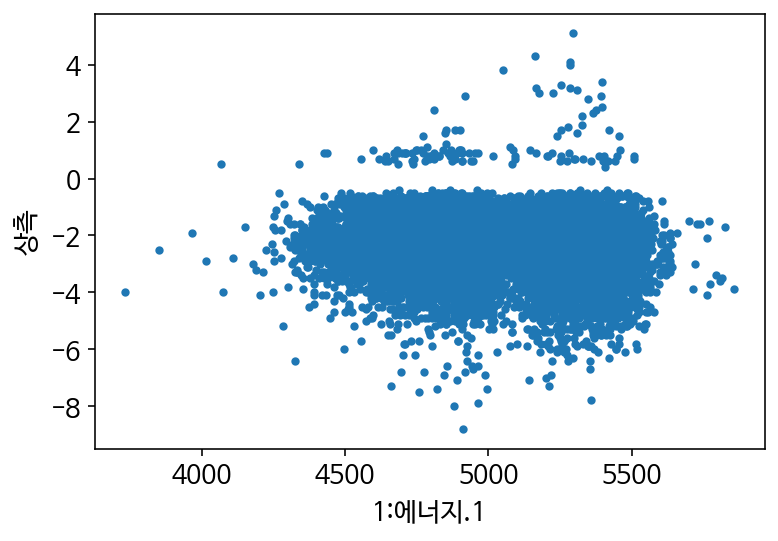

In [67]:
## 데이터 탐색 (산포도)

for col in ['1:에너지.1']:
    plt.scatter(c2_data[col] , c2_data['상측'], s=10)
    plt.ylabel('상측')
    plt.xlabel(col)
    plt.show()

In [76]:
## 회귀 모델의 성능 평가 지표

# Maximum Error
# MAE: mean absolute error
# RMSE: root MSE
# R-Squared

def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred, multioutput='raw_values').round(3))

In [84]:
## 특성 중요도 보기

def plot_feature_weight(feature, weight):
    plt.figure(figsize=(5,30))
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

In [78]:
c2_data[:1]

,라인,작업일자,모델코드,모델이름,바코드,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:평균출력1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:평균출력1.1,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
7,1,2022-10-04,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2O41005,2.1,78,15.06,3938,2167,2003,2.0,75,15.06,2983,1702,1590,2.0,74,15.11,3208,1788,1728,2.0,72,15.08,2928,1856,1633,2.0,68,15.07,2925,1865,1637,2.0,68,15.08,3396,2023,1850,2.0,66,15.09,2555,1656,1411,2.0,76,15.01,2798,1655,1454,2.0,66,15.0,3427,2229,1805,2.0,77,15.05,4516,2542,2382,2.0,78,14.99,5600,2999,2999,2.0,83,15.13,4998,2842,2653,2.0,82,14.97,5044,2875,2746,2.0,76,14.97,5334,2999,2888,2.0,80,15.01,5049,2935,2729,2.0,73,14.99,5111,2870,2701,1.8,71,14.98,4130,2504,2459,2.0,80,15.02,3644,2047,1970,2.0,80,15.01,5405,2999,2851,2.0,70,14.96,5278,2945,2819,2.0,81,15.0,4671,2905,2515,2.0,76,15.07,4550,2502,2417,2.0,62,14.99,4104,2285,2202,2.0,85,15.04,5177,2875,2770,2.0,75,15.04,4795,2951,2677,2.1,80,15.04,5205,2940,2652,2.0,62,15.03,4724,2718,2526,1.8,66,15.02,3200,1990,1932,合,-2.1,合,-2.4,合,-1.2,合,-1.3,合


In [79]:
c2_data_2000 = c2_data.sample(n = 2000)

In [80]:
c2_data_2000

,라인,작업일자,모델코드,모델이름,바코드,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:평균출력1,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:평균출력1,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:평균출력1,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:평균출력1,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:평균출력1,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:평균출력1,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:평균출력1,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:평균출력1,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:평균출력1,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:평균출력1,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:평균출력1,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:평균출력1,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:평균출력1,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:평균출력1,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:평균출력1,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:평균출력1,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:평균출력1,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:평균출력1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:평균출력1.1,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
18376,1,2022-10-31,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2OX10BD,2.0,76,15.06,3348,1944,1833,2.0,70,15.07,2719,1519,1446,1.8,64,15.10,2983,1829,1758,2.0,72,15.06,3214,1747,1719,2.0,67,15.06,2946,1595,1565,2.0,67,15.08,3338,1843,1784,1.9,68,15.08,3007,1918,1801,2.0,84,15.01,3309,1910,1684,1.9,70,15.01,3293,2011,1858,1.9,74,15.02,4437,2595,2504,2.0,78,14.97,4566,2522,2429,2.0,83,15.09,5217,2937,2732,2.0,85,14.94,5125,2903,2795,2.0,73,14.95,4796,2817,2613,2.0,85,14.98,4937,2718,2632,2.0,78,14.97,4951,2785,2660,1.9,73,14.95,4091,2423,2320,2.0,76,14.99,3684,2121,1882,2.0,80,14.98,5198,2981,2778,2.0,70,14.93,5056,2873,2720,2.0,82,14.96,4893,2828,2675,2.0,80,15.03,4299,2603,2365,1.9,70,15.00,3881,2472,2305,2.0,88,15.01,4556,2732,2457,2.0,83,15.00,5018,2967,2790,2.0,88,15.03,4876,2926,2658,2.0,70,15.01,4799,2728,2605,2.0,75,14.91,4560,2493,2417,合,-3.5,合,-4.5,合,-1.2,合,-1.6,合
6119,1,2022-10-12,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2OC10TN,2.0,74,15.06,3143,1968,1760,2.0,71,15.07,2758,1556,1466,2.0,68,15.11,2754,1551,1487,2.0,68,15.06,2756,1665,1562,2.0,66,15.07,3080,1692,1663,2.0,64,15.08,2830,1740,1500,2.0,64,15.09,3063,1731,1614,2.0,73,15.01,2762,1625,1458,2.0,66,15.01,3017,1731,1602,2.0,70,15.02,4012,2209,2110,2.0,72,14.96,4901,2745,2601,2.1,72,15.07,4880,2579,2439,2.1,82,14.94,5304,2729,2679,2.1,69,14.93,5290,2718,2687,2.1,81,14.98,5042,2620,2555,2.0,72,14.96,4579,2465,2435,1.8,73,14.95,3771,2371,2260,1.8,71,14.99,3537,2189,2088,2.0,79,14.98,5276,2900,2779,2.0,75,14.94,5378,2935,2894,2.1,85,14.96,5366,2923,2744,2.0,83,15.03,4851,2795,2576,2.0,65,15.00,3604,2307,1990,2.0,85,15.02,5371,2919,2845,2.0,83,15.00,5097,2996,2809,2.1,86,15.03,5176,2777,2606,2.0,65,15.02,4879,2738,2573,1.8,65,15.00,3301,1993,1953,合,-2.7,合,-2.9,合,-1.2,合,-1.8,合
6313,1,2022-10-13,ACQ30461107,"77C2"" GI DARK TITAN SILVER",SACQ30461107KTS2OD101D,2.0,74,15.07,3578,2014,1970,2.0,73,15.07,2959,1638,1559,2.0,70,15.12,3122,1784,1676,2.0,72,15.07,3227,1815,1745,2.0,71,15.08,3631,2036,1978,2.0,66,15.09,3315,2072,1789,2.1,66,15.10,3143,1747,1588,2.0,75,15.02,2880,1643,1513,2.0,66,15.02,3345,2101,1782,2.0,75,15.03,4392,2490,2354,2.0,75,14.97,5265,2861,2793,2.1,75,15.09,5207,2776,2589,2.1,84,14.94,5648,2898,2853,2.1,70,14.95,5475,2916,2793,2.1,82,14.99,5323,2770,2682,2.0,74,14.97,4922,2659,2586,1.9,77,14.97,4144,2470,2321,1.9,78,15.01,3981,2389,2194,2.0,79,14.99,5276,2927,2769,2.0,77,14.94,5346,2966,2887,2.1,86,14.97,5345,2990,2742,2.0,85,15.04,5219,2900,2774,2.0,72,15.01,4233,2454,2299,2.0,85,15.02,5143,2934,2753,2.0,86,15.01,5404,2999,2999,2.1,88,15.03,5461,2998,2820,2.0,68,15.02,5039,2906,2666,2.0,73,15.01,4689,2551,2467,不,-4.7,合,-5.2,不,-1.7,合,-2.8,合
44,1,2022-10-04,ACQ30461107,

In [81]:
## 훈련 데이터와 검증 데이터 준비

features = c2_data_2000.columns.difference(['라인','작업일자', '모델코드', '모델이름', '바코드', '종합판정', '상측', '판정', '하측', '판정.1', '좌측', '판정.2', '우측', '판정.3'])
X = c2_data_2000[features]
y = c2_data_2000[['상측', '하측', '좌측', '우측']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

depth:  19 , R-squared:  0.2557


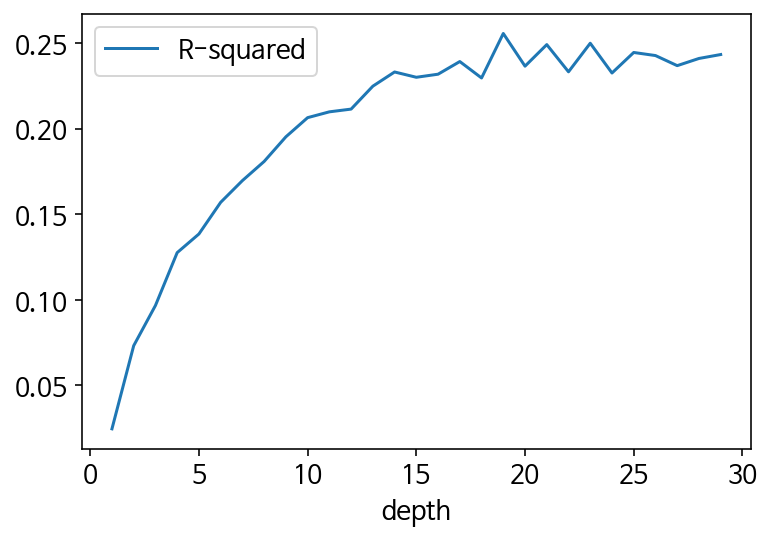

In [82]:
## 랜덤 포레스트를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    rfr = RandomForestRegressor(max_depth=depth) 
    rfr.fit(X_train, y_train) 
    res.append((depth, rfr.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  상측    4.458
하측    5.202
좌측    1.417
우측    1.556
dtype: float64
Mean Absolute Error:  상측    0.622
하측    0.561
좌측    0.204
우측    0.223
dtype: float64
Root Mean Squared Error:  0.552
R-Squared:  [0.282 0.237 0.214 0.214]


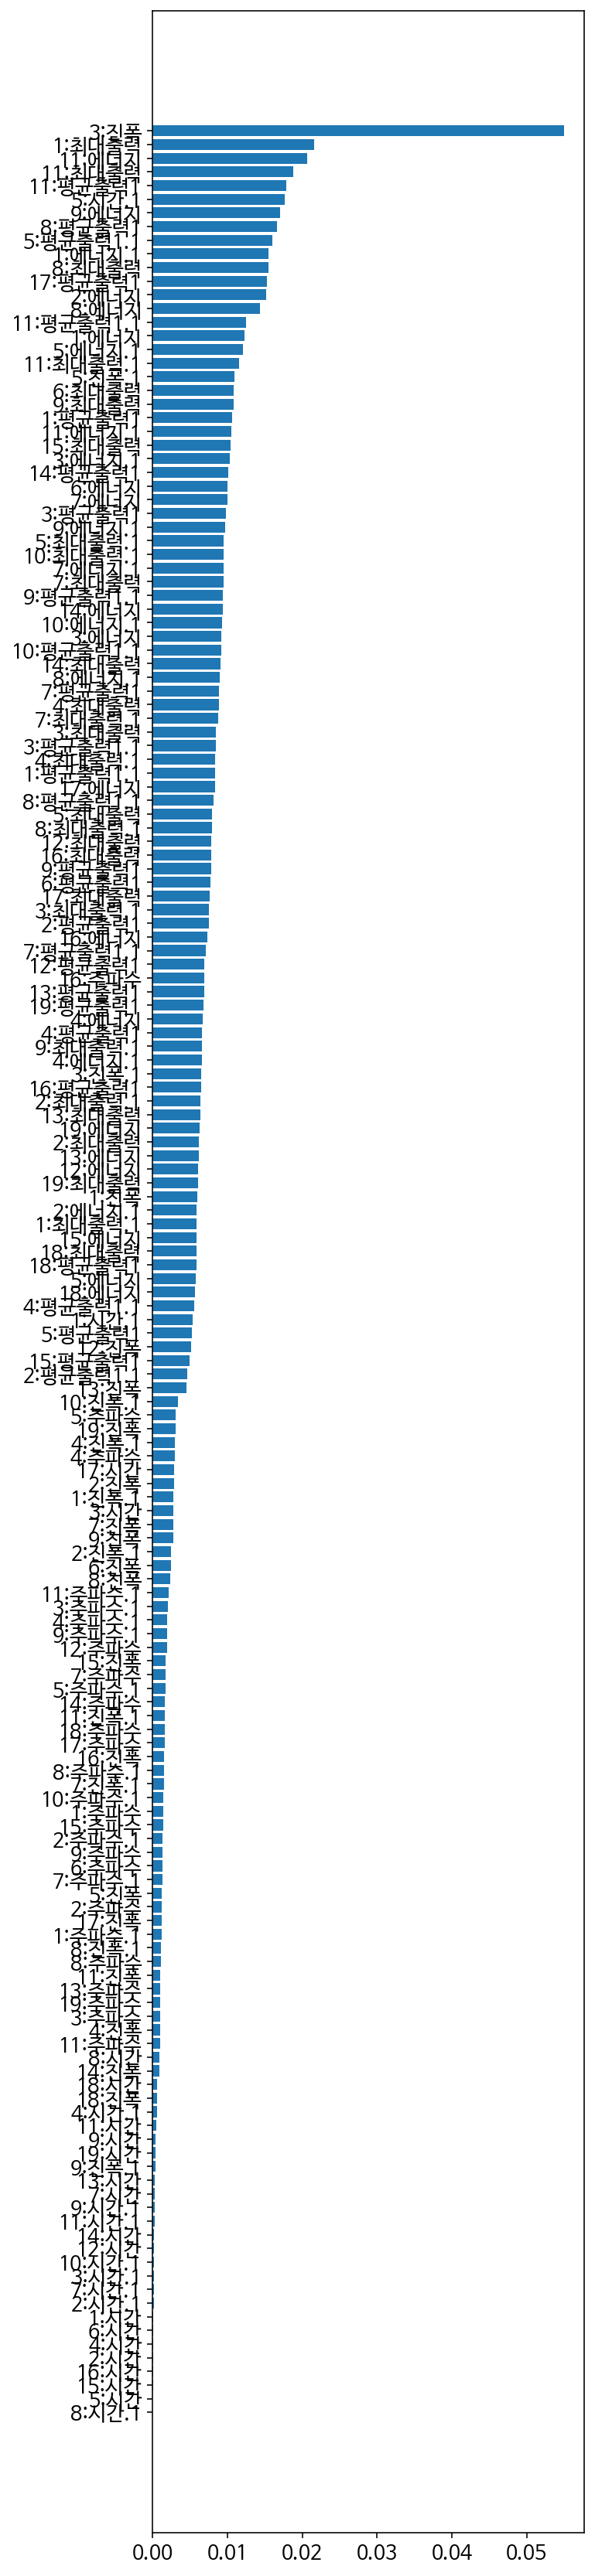

In [85]:
## 랜덤 포레스트 모델 성능 확인

rfr = RandomForestRegressor(max_depth=20)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, rfr.feature_importances_)